In [2]:
import numpy as np
import matplotlib as plt
import pandas as pd
import re

# Natural Language Tool Kit 
import nltk
nltk.download('stopwords')
 
# Removing stopword 
from nltk.corpus import stopwords 
  
# Stemming   
from nltk.stem.porter import PorterStemmer


[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [3]:
train = pd.read_csv('C://Users//acer//Downloads//DataAnalystTestData.csv')

DATASET = train //Details

In [62]:
train.head()

Review        date  \
0  Go left and avoid the crowd / Surf sleep drink...  2019/04/16   
1  There is a decent section of beach but the bui...  2019/04/16   
2  The beach is clean and being close to the reef...  2019/04/16   
3  A nice clean beach with a few restaurants all ...  2019/04/16   
4  the beach is beautiful. great surfing spot. bu...  2019/04/16   

         Author                         Location  
0    674darrylt             Southport, Australia  
1     MasafiOne     Al Ain, United Arab Emirates  
2         RHM63      Oxfordshire, United Kingdom  
3   carterkenny                 Phuket, Thailand  
4  ThomasArabia  Abu Dhabi, United Arab Emirates

.

.

Information about the dataset train  

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5618 entries, 0 to 5617
Data columns (total 4 columns):
Review      5618 non-null object
date        5618 non-null object
Author      5618 non-null object
Location    4606 non-null object
dtypes: object(4)
memory usage: 175.6+ KB


In [58]:
print("Number of Locations not mentioned:",sum(train.Location.isnull()))
print("Percentage of above:",100*sum(train.Location.isnull())/5618)

Number of Locations not mentioned: 1012
Percentage of above: 18.013527945888217


                INSIGHT-i.) Number of Locations that are not mentioned = 1012 => 18%






.


Describing the dataset :-
 The dataset is a set of reviews about the visit to SriLAnka by different people from different locations on different dates.
The dataset has 5618 entries with fields - Review, date, Author and Location .

In [64]:
train.describe()

Review        date  \
count                                                5618        5618   
unique                                               5607         344   
top     The fort and its colonial interior are somethi...  2019/04/16   
freq                                                    2         150   

         Author                Location  
count      5618                    4606  
unique     3973                    1328  
top     Umang A  London, United Kingdom  
freq         12                     251

In [4]:
dte=train['date'].nunique()

In [5]:
dte = train.groupby('date').nunique()

print (dte.sort_values('Review',ascending=False).head())
print ("\n",dte.sort_values('Author',ascending=False).head())

            Review  date  Author  Location
date                                      
2019/04/16     150     1     118        76
2019/01/16      40     1      32        21
2018/08/27      39     1      34        19
2019/01/21      38     1      28        23
2019/01/20      38     1      28        23

             Review  date  Author  Location
date                                      
2019/04/16     150     1     118        76
2018/08/27      39     1      34        19
2018/12/30      36     1      33        29
2018/06/19      37     1      33        29
2019/01/16      40     1      32        21


In [71]:
dte['Review'].max()

150

In [84]:
train[(train['date']=='2019/04/16') ].describe()

Review        date  \
count                                                 150         150   
unique                                                150           1   
top     Amazing feeling so much to see and learn.. fee...  2019/04/16   
freq                                                    1         150   

          Author                     Location  
count        150                          130  
unique       118                           76  
top     K8errm24  Dubai, United Arab Emirates  
freq           5                           10

                    INSIGHT ii.) The maximum number of reviews were on the date 2019/04/16 . 118 tourists from 76 Locations(excluding 20 non mentioned Locations) wrote 150 reviews . Among them, majority was from Dubai,UAE .

.

In [6]:
dte1 = train.groupby('Author').nunique()

print (dte1)
print(dte1.sort_values('Review',ascending = False))

train[train['Author']=='Umang A']



                      Review  date  Author  Location
Author                                              
-Guzzis-are-ace-           3     2       1         1
01tw1969                   2     1       1         1
0428Luna                   1     1       1         1
09umang                    1     1       1         1
1000Rainer                 1     1       1         1
100russellt                1     1       1         1
101cheriet                 1     1       1         1
106christie                3     2       1         1
111aleksandran             1     1       1         1
113jennin                  1     1       1         0
117LauG                    1     1       1         1
119claire                  2     1       1         1
1206Juni                   1     1       1         1
121Ralph121                1     1       1         1
123lakshmanana             1     1       1         1
123tonim                   2     1       1         1
1266ali                    1     1       1    

Review        date   Author  \
2867  One of the most beautiful reserves in Sri Lank...  2018/11/20  Umang A   
2870  The old town of Galle is protatcted by the wal...  2018/11/20  Umang A   
2872  Galle fort or the old town is probably the bes...  2018/11/20  Umang A   
3248  This national park is famoua for world's end p...  2018/10/25  Umang A   
3660  Sri Lanka is also famous for wild life and maj...  2018/09/26  Umang A   
3682  One of the most famous Budha temple in Sri Lan...  2018/09/25  Umang A   
3695  As I said this is d most famous tourist attrac...  2018/09/23  Umang A   
3696  The most famous attraction of Sri Lanka... A 2...  2018/09/23  Umang A   
3702  Probably this is the best place to have a grea...  2018/09/23  Umang A   
4102  This beach is located a bit outside colombo bu...  2018/08/27  Umang A   
4117  One of the oldest museum in Sri Lanka. This pl...  2018/08/27  Umang A   
4234  The temple of Hairs. This temple have the reli...  2018/08/21  Umang A   

           Location  
2867  Mumbai, India  
2870  Mumbai, India  
2872  Mumbai, India  
3248  Mumbai, India  
3660  Mumbai, India  
3682  Mumbai, India  
3695  Mumbai, India  
3696  Mumbai, India  
3702  Mumbai, India  
4102  Mumbai, India  
4117  Mumbai, India  
4234  Mumbai, India

In [20]:
dte11=dte1[(dte1['Review']>1) & (dte1['date']>1)]
print(dte11.head(10))
print(dte11.shape)

                  Review  date  Author  Location
Author                                          
-Guzzis-are-ace-       3     2       1         1
106christie            3     2       1         1
150dwaynem             3     2       1         1
211priyankap           2     2       1         1
21rebekar              2     2       1         1
264sallyh              3     2       1         1
301lisa33              4     3       1         1
307cliver              7     6       1         1
318zarai               2     2       1         1
376rakeshm             2     2       1         1
(563, 4)


In [19]:
print('% of people revisited more than once:',100*dte11.shape[0]/train['Author'].nunique())

% of people revisited more than once: 14.170651900327208


In [26]:
train1[train1['Author']=='Umang A']

Review        date   Author  \
2867  One of the most beautiful reserves in Sri Lank...  2018/11/20  Umang A   
2870  The old town of Galle is protatcted by the wal...  2018/11/20  Umang A   
2872  Galle fort or the old town is probably the bes...  2018/11/20  Umang A   
3248  This national park is famoua for world's end p...  2018/10/25  Umang A   
3660  Sri Lanka is also famous for wild life and maj...  2018/09/26  Umang A   
3682  One of the most famous Budha temple in Sri Lan...  2018/09/25  Umang A   
3695  As I said this is d most famous tourist attrac...  2018/09/23  Umang A   
3696  The most famous attraction of Sri Lanka... A 2...  2018/09/23  Umang A   
3702  Probably this is the best place to have a grea...  2018/09/23  Umang A   
4102  This beach is located a bit outside colombo bu...  2018/08/27  Umang A   
4117  One of the oldest museum in Sri Lanka. This pl...  2018/08/27  Umang A   
4234  The temple of Hairs. This temple have the reli...  2018/08/21  Umang A   

           Location  
2867  Mumbai, India  
2870  Mumbai, India  
2872  Mumbai, India  
3248  Mumbai, India  
3660  Mumbai, India  
3682  Mumbai, India  
3695  Mumbai, India  
3696  Mumbai, India  
3702  Mumbai, India  
4102  Mumbai, India  
4117  Mumbai, India  
4234  Mumbai, India

                    INSIGHT iii.) Umang A from Mumbai,India has reviewed the most number of times. He has reviewed in 8th,9th,10th and 11th month of 2018 and he has really enjoyed the tour.

.

.

In [95]:
dte2 = train.groupby('Location').nunique()

print (dte2.sort_values('Review',ascending=False).head())

                        Review  date  Author  Location
Location                                              
London, United Kingdom     250   151     168         1
Colombo, Sri Lanka         198   120     145         1
Melbourne, Australia       126   101      94         1
Sydney, Australia          114    77      70         1
Mumbai, India               89    65      57         1


In [101]:
train[train['Location'] == 'London, United Kingdom'].groupby('date').nunique().sort_values('Author',ascending=False)

Review  date  Author  Location
date                                      
2019/04/16       7     1       6         1
2019/03/12       3     1       3         1
2019/02/20       3     1       3         1
2019/02/21       3     1       3         1
2018/08/12       3     1       3         1
2018/10/03       3     1       3         1
2019/01/24       3     1       3         1
2019/03/11       4     1       3         1
2019/03/06       3     1       3         1
2018/11/13       4     1       2         1
2019/01/29       4     1       2         1
2018/12/19       3     1       2         1
2018/12/31       3     1       2         1
2018/09/02       2     1       2         1
2018/12/09       2     1       2         1
2019/02/12       2     1       2         1
2018/09/20       2     1       2         1
2018/12/05       2     1       2         1
2019/02/05       2     1       2         1
2018/10/07       4     1       2         1
2019/02/03       2     1       2         1
2018/10/17       2     1       2         1
2018/11/10       3     1       2         1
2019/01/25       2     1       2         1
2019/01/05       2     1       2         1
2019/01/22       2     1       2         1
2018/08/19       3     1       2         1
2018/11/17       2     1       2         1
2019/01/12       2     1       2         1
2018/10/28       3     1       2         1
...            ...   ...     ...       ...
2018/11/08       1     1       1         1
2018/12/15       1     1       1         1
2018/12/14       1     1       1         1
2018/12/11       2     1       1         1
2018/12/10       1     1       1         1
2018/12/04       1     1       1         1
2018/12/02       1     1       1         1
2018/05/03       2     1       1         1
2018/11/28       2     1       1         1
2018/11/26       1     1       1         1
2018/11/25       1     1       1         1
2018/11/21       1     1       1         1
2018/11/16       1     1       1         1
2018/11/11       1     1       1         1
2018/11/05       1     1       1         1
2018/10/05       1     1       1         1
2018/11/01       3     1       1         1
2018/10/31       1     1       1         1
2018/10/30       1     1       1         1
2018/10/27       1     1       1         1
2018/10/25       2     1       1         1
2018/10/24       1     1       1         1
2018/10/23       4     1       1         1
2018/10/21       1     1       1         1
2018/10/15       1     1       1         1
2018/10/14       1     1       1         1
2018/10/12       1     1       1         1
2018/10/11       1     1       1         1
2018/10/08       3     1       1         1
2018/11/29       1     1       1         1

[151 rows x 4 columns]

                     INSIGHT iv.) The majority of the tourists are from London,United Kingdom and among them most of the travellers prefer to travel during October - April period.

.

.

.......

.......

#To find the percentage of positive,negative and neutral reviews

In [10]:
import nltk
#nltk.download()
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SIA()

C:\Users\acer\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [25]:
train1=train.copy()
train1.head()

Review        date  \
0  Go left and avoid the crowd / Surf sleep drink...  2019/04/16   
1  There is a decent section of beach but the bui...  2019/04/16   
2  The beach is clean and being close to the reef...  2019/04/16   
3  A nice clean beach with a few restaurants all ...  2019/04/16   
4  the beach is beautiful. great surfing spot. bu...  2019/04/16   

         Author                         Location  
0    674darrylt             Southport, Australia  
1     MasafiOne     Al Ain, United Arab Emirates  
2         RHM63      Oxfordshire, United Kingdom  
3   carterkenny                 Phuket, Thailand  
4  ThomasArabia  Abu Dhabi, United Arab Emirates

In [128]:
train1['neg']=train1['Review'].apply(lambda x:sid.polarity_scores(x)['neg'])
train1['pos']=train1['Review'].apply(lambda x:sid.polarity_scores(x)['pos'])
train1['neu']=train1['Review'].apply(lambda x:sid.polarity_scores(x)['neu'])
train1['compound']=train1['Review'].apply(lambda x:sid.polarity_scores(x)['compound'])

In [129]:
pos_review= [j for i,j in enumerate(train1['Review']) if train1['compound'][i] > 0.25 ]
neu_review= [j for i,j in enumerate(train1['Review']) if 0.25>= train1['compound'][i] >= -0.25 ]
neg_review= [j for i,j in enumerate(train1['Review']) if train1['compound'][i] < -0.25 ]

In [111]:
print('positive review -  ',100*len(pos_review)/len(train1['Review']),'%') #+100*len(neg_review)/len(train['Review']) + 100*len(neu_review)/len(train['Review'])
print('negative review -  ',100*len(neg_review)/len(train1['Review']),'%')
print('neutral review -  ',100*len(neu_review)/len(train1['Review']),'%')

positive review -   87.43325026699893 %
negative review -   5.411178355286578 %
neutral review -   7.155571377714489 %


                    INSIGHT v.)From the reviews we can conclude that 
1) 87.4% of the reviewers are giving positive feedback , 5.4% of them are fiving negative reviews and rest is having a neutral opinion( with a threshold of compound score = 0.25).


(array([  76.,   80.,   87.,   90.,  183.,  141.,  259.,  563., 1129.,
        3010.]),
 array([-0.9761 , -0.77853, -0.58096, -0.38339, -0.18582,  0.01175,
         0.20932,  0.40689,  0.60446,  0.80203,  0.9996 ]),
 <a list of 10 Patch objects>)

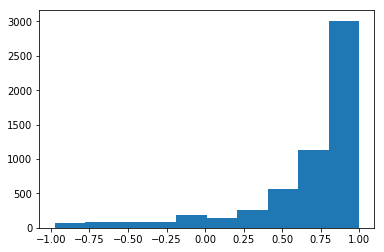

In [171]:
# y contains answers if review is positive or negative 
y = train1.iloc[:, 7].values
plt.hist(y)

.

.

In [151]:
train1.head(20)

Review        date  \
0   Go left and avoid the crowd / Surf sleep drink...  2019/04/16   
1   There is a decent section of beach but the bui...  2019/04/16   
2   The beach is clean and being close to the reef...  2019/04/16   
3   A nice clean beach with a few restaurants all ...  2019/04/16   
4   the beach is beautiful. great surfing spot. bu...  2019/04/16   
5   My advice... do it in the morning before it ge...  2019/04/16   
6   We were very excited to visit .. and more exci...  2019/04/16   
7   The ancient city was one of our favorite stops...  2019/04/16   
8   What an experience it is to climb the rock. Ou...  2019/04/16   
9   This area is fascinating. The museum gives a g...  2019/04/16   
10  Having spent 2 weeks travelling around Sri Lan...  2019/04/16   
11  We climbed the rock and where not let down, it...  2019/04/16   
12  A steep climb up narrow steps following a stea...  2019/04/16   
13  For me, in my opinion, I don’t think it was th...  2019/04/16   
14  This is a fortress and ancient city which if y...  2019/04/16   
15  We visited Sigiriya early morning - I think th...  2019/04/16   
16  Sigiriya Lion's Rock is one of the best and fa...  2019/04/16   
17  I truly enjoyed climbing Sigiriya Rock. Got th...  2019/04/16   
18  The earlier the better to beat the heat and th...  2019/04/16   
19  A big respect to my wife, she had fractured he...  2019/04/16   

                  Author                         Location    neg    pos  \
0             674darrylt             Southport, Australia  0.115  0.000   
1              MasafiOne     Al Ain, United Arab Emirates  0.195  0.065   
2                  RHM63      Oxfordshire, United Kingdom  0.000  0.217   
3            carterkenny                 Phuket, Thailand  0.000  0.375   
4           ThomasArabia  Abu Dhabi, United Arab Emirates  0.085  0.275   
5   MelbourneSeeTheWorld                 Galle, Sri Lanka  0.027  0.168   
6               Malini P        Bangalore District, India  0.060  0.194   
7               K8errm24      Dubai, United Arab Emirates  0.034  0.237   
8                SteveUz           London, United Kingdom  0.017  0.027   
9           Davbesfoodie            Bairnsdale, Australia  0.000  0.192   
10             Hamsta666                              NaN  0.018  0.066   
11             Samsam802      Borehamwood, United Kingdom  0.065  0.141   
12          Nancy_Ottawa                   Ottawa, Canada  0.072  0.141   
13               Jyblada                Bangkok, Thailand  0.000  0.063   
14           JaniJermans                 Bengaluru, India  0.000  0.102   
15         dannyrcollins                            essex  0.031  0.245   
16       Srilanka_Travel               Colombo, Sri Lanka  0.011  0.354   
17           europhile68             Melbourne, Australia  0.035  0.192   
18               Romaica                Alexandria, Egypt  0.000  0.119   
19      Vacationer795761                              NaN  0.000  0.256   

      neu  compound  
0   0.885   -0.2960  
1   0.740   -0.7837  
2   0.783    0.7269  
3   0.625    0.9001  
4   0.640    0.7587  
5   0.805    0.9656  
6   0.745    0.9823  
7   0.729    0.7003  
8   0.956    0.2598  
9   0.808    0.9516  
10  0.916    0.5399  
11  0.794    0.8169  
12  0.786    0.8325  
13  0.937    0.4295  
14  0.898    0.4553  
15  0.724    0.9824  
16  0.634    0.9888  
17  0.773    0.9539  
18  0.881    0.9561  
19  0.744    0.9619

.

.

.

In [114]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt
from dateutil.parser import parse

In [ ]:
corpus = []
for i in range(0, 5618):
    review = re.sub('[^a-zA-Z]', ' ', train['Review'][i])  
      
    # convert all cases to lower cases 
    review = review.lower()  
      
    # split to array(default delimiter is " ") 
    review = review.split()  
      
    # creating PorterStemmer object to 
    # take main stem of each word 
    ps = PorterStemmer()  
      
    # loop for stemming each word 
    # in string array at ith row     
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))]  
                  
    # rejoin all string array elements 
    # to create back into a string 
    review = ' '.join(review)   
      
    # append each string to create 
    # array of clean text  
    corpus.append(review)

How many most common words to print: 50

OK. The 50 most common words are as follows

visit :  2259
place :  2165
templ :  1934
view :  1887
see :  1828
walk :  1786
climb :  1496
top :  1493
beach :  1476
get :  1418
go :  1333
time :  1297
one :  1271
rock :  1240
sri :  1233
worth :  1194
take :  1178
around :  1147
beauti :  1135
lot :  1106
good :  1006
well :  995
great :  978
lanka :  976
guid :  963
nice :  950
day :  944
peopl :  911
also :  885
mani :  846
us :  796
way :  783
would :  766
water :  752
amaz :  744
hour :  731
crowd :  715
park :  707
must :  705
realli :  700
even :  686
love :  682
much :  670
like :  664
histori :  652
earli :  651
enjoy :  648
tourist :  642
fort :  632
make :  618


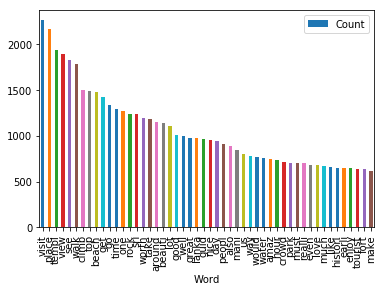

In [115]:
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for a in corpus:
 for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    #if word not in stopwords:
    if word not in wordcount:
            wordcount[word] = 1
    else:
            wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Close the file
#file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

                Insight vi.)Most of the reviews were about temple and beaches.

.

.

In [136]:
corpus

['go left avoid crowd surf sleep drink eat repeat experi cosmopolitan line camaraderi',
 'decent section beach build adjac beach attack fairli big wave doubt last long use smart way protect coastlin put rock front',
 'beach clean close reef one see fish sea life sea ideal surf',
 'nice clean beach restaur sunb free partak food drink wave pretti big time',
 'beach beauti great surf spot bewar undercurr strong realli downsid close proxim main road',
 'advic morn get hot step climb could challeng said realli worth impress human ingenu construct templ view top impress fresco remain rock wall stun note photographi allow area overal impress maintain right remov plastic wrap drink bottl checkpoint bag also check plastic materi could contamin site model countri could follow stair case quit safe though see becom busi sign hornet advisori definit issu us get park open avoid crowd certainli worth climb',
 'excit visit excit climb year old trust journey nice destin even worth walk tip pleas start 

In [ ]:
# Creating the Bag of Words model 
from sklearn.feature_extraction.text import CountVectorizer 
  
# To extract max 1500 feature. 
# "max_features" is attribute to 
# experiment with to get better results 
cv = CountVectorizer(max_features = 1500)  
  
# X contains corpus (dependent variable) 
X = cv.fit_transform(corpus).toarray()

.

.

For finding words occurances in each review

In [43]:
def Tokenizer(str_input):
    words2 = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    porter_stemmer=nltk.PorterStemmer()
    words2 = [porter_stemmer.stem(word) for word in words2]
    return words2
"""def Tokenizer(str_input):
    words2 = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    porter_stemmer=nltk.PorterStemmer()
    words2 = [porter_stemmer.stem(word) for word in words]
    return words"""
for sent in train1['Review']:
    print(Tokenizer(sent))

['go', 'left', 'and', 'avoid', 'the', 'crowd', 'surf', 'sleep', 'drink', 'eat', 'repeat', 'experi', 'the', 'cosmopolitan', 'line', 'up', 'and', 'camaraderi']
['there', 'is', 'a', 'decent', 'section', 'of', 'beach', 'but', 'the', 'build', 'adjac', 'to', 'the', 'beach', 'are', 'under', 'attack', 'from', 'fairli', 'big', 'wave', 'and', 'i', 'doubt', 'they', 'will', 'last', 'long', 'becaus', 'they', 'are', 'not', 'use', 'smart', 'way', 'to', 'protect', 'the', 'coastlin', 'put', 'rock', 'in', 'front', 'of', 'a', 'more']
['the', 'beach', 'is', 'clean', 'and', 'be', 'close', 'to', 'the', 'reef', 'one', 'can', 'see', 'some', 'fish', 'and', 'sea', 'life', 'the', 'sea', 'is', 'ideal', 'for', 'surf']
['a', 'nice', 'clean', 'beach', 'with', 'a', 'few', 'restaur', 'all', 'have', 'sunb', 'free', 'if', 'you', 'partak', 'in', 'food', 'or', 'drink', 'wave', 'can', 'be', 'pretti', 'big', 'at', 'time']
['the', 'beach', 'is', 'beauti', 'great', 'surf', 'spot', 'but', 'bewar', 'of', 'undercurr', 'which', '

['the', 'unesco', 'list', 'gall', 'fort', 'wa', 'on', 'the', 'list', 'of', 'place', 'to', 'visit', 'the', 'wall', 'of', 'the', 'fort', 'are', 'in', 'tact', 'and', 'provid', 'an', 'amaz', 'view', 'of', 'the', 'sea', 'the', 'surround', 'area', 'is', 'it', 'well', 'maintain', 'and', 'is', 'veri', 'hot', 'i', 'would', 'suggest', 'sunscreen', 'a', 'hat', 'and', 'plenti', 'of', 'water', 'tri', 'visit', 'in', 'the', 'even', 'near', 'sunset', 'fir', 'great', 'view', 'or', 'bring', 'swimmer', 'for', 'a', 'dip', 'near', 'the', 'lighthous']
['visit', 'to', 'gall', 'fort', 'with', 'mr', 'magesh', 'wa', 'amaz', 'nice', 'place', 'and', 'the', 'hospit', 'of', 'the', 'peopl', 'wa', 'excel']
['worth', 'a', 'visit', 'the', 'wall', 'ruin', 'and', 'fort', 'are', 'across', 'the', 'town', 'so', 'you', 'need', 'to', 'be', 'prepar', 'to', 'walk', 'and', 'will', 'certainli', 'need', 'sun', 'cream', 'as', 'there', 's', 'limit', 'shade', 'there', 'are', 'restaur', 'dot', 'around', 'with', 'small', 'area', 'of', 

['mostli', 'tourist', 'thi', 'beach', 'ha', 'some', 'good', 'and', 'power', 'wave', 'and', 'a', 'beauti', 'sandi', 'beach', 'not', 'too', 'overcrowd', 'nice', 'place', 'to', 'swim', 'or', 'bodi', 'surf', 'be', 'care', 'of', 'the', 'undertow']
['mirissa', 'beach', 'wa', 'a', 'love', 'place', 'to', 'relax', 'and', 'swim', 'lot', 'of', 'great', 'restaur', 'option', 'on', 'the', 'beach', 'in', 'the', 'even']
['mirissa', 'beach', 'is', 'up', 'there', 'with', 'the', 'best', 'beach', 'along', 'the', 'south', 'coast', 'it', 'ha', 'a', 'multitud', 'of', 'restaur', 'and', 'bar', 'overlook', 'the', 'water', 'it', 's', 'a', 'veri', 'well-known', 'spot', 'for', 'surfer', 'as', 'the', 'water', 'is', 'fit', 'for', 'both', 'beginn', 'and', 'more', 'experienc', 'surfer', 'alik', 'it', 's', 'veri', 'easi', 'to', 'get', 'to', 'and', 'there', 'are', 'a', 'ton', 'of', 'hotel', 'accommod', 'nearbi', 'should', 'you', 'plan', 'to', 'stay', 'in', 'the', 'area', 'tuk', 'tuk', 'flood', 'the', 'street', 'througho

['climb', 'the', 'rock', 'of', 'sigiriya', 'is', 'an', 'essenti', 'part', 'of', 'a', 'visit', 'to', 'sri', 'lanka', 'and', 'possibl', 'the', 'most', 'memor', 'it', 'can', 'be', 'crowd', 'and', 'hot', 'but', 'experienc', 'the', 'climb', 'togeth', 'with', 'the', 'thousand', 'of', 'sri', 'lankan', 'peopl', 'is', 'not', 'to', 'be', 'miss', 'get', 'there', 'earli', 'and', 'take', 'plenti', 'of', 'water', 'a', 'back', 'pack', 'is', 'a', 'good', 'idea', 'to', 'leav', 'hand', 'free', 'as', 'some', 'of', 'the', 'climb', 'is', 'quit', 'steep', 'and', 'expos', 'although', 'alway', 'robust', 'and', 'safe', 'there', 'are', 'a', 'lot', 'of', 'step', 'but', 'it', 'is', 'alway', 'crowd', 'so', 'the', 'rate', 'of', 'climb', 'is', 'leisur', 'and', 'doe', 'not', 'feel', 'strenuou', 'for', 'the', 'older', 'person', 'the', 'climb', 'itself', 'is', 'excit', 'and', 'breathtak', 'but', 'there', 'is', 'also', 'the', 'most', 'stun', 'cave', 'art', 'after', 'a', 'short', 'stretch', 'up', 'a', 'spiral', 'staircas

['in', 'the', 'even', 'time', 'me', 'and', 'my', 'love', 'husband', 'went', 'there', 'lot', 'of', 'mind', 'relax', 'and', 'great', 'place', 'with', 'buddha', 's', 'tooth', 'relic', 'drummer', 'were', 'there', 'and', 'it', 'wa', 'the', 'time', 'that', 'do', 'thewawa', 'nice', 'experi', 'lot', 'of', 'local', 'and', 'foreign', 'were', 'there', 'at', 'that', 'time']
['i', 'have', 'to', 'say', 'i', 'expect', 'more', 'i', 'understand', 'it', 'is', 'a', 'religi', 'site', 'and', 'therefor', 'mean', 'a', 'lot', 'to', 'a', 'lot', 'of', 'peopl', 'but', 'as', 'a', 'complex', 'there', 'is', 'littl', 'that', 'stand', 'out']
['to', 'even', 'get', 'into', 'the', 'area', 'your', 'attir', 'and', 'you', 'have', 'to', 'be', 'individu', 'check', 'by', 'someon', 'at', 'a', 'gate', 'checkpoint', 'i', 'wa', 'wear', 'capri', 'abov', 'my', 'ankl', 'and', 'a', 'short-sleev', 'shirt', 'i', 'had', 'a', 'scarf', 'around', 'my', 'neck', 'shoulder', 'and', 'still', 'they', 'made', 'me', 'put', 'on', 'the', 'thick', '

['it', 'a', 'love', 'place', 'to', 'spend', 'your', 'even', 'besid', 'kandi', 'lake', 'and', 'enjoy', 'the', 'light', 'of', 'the', 'templ', 'you', 'would', 'feel', 'posit', 'at', 'the', 'place', 'with', 'a', 'spiritu', 'atmospher']
['one', 'of', 'the', 'highlight', 'of', 'our', 'tour', 'of', 'sri', 'lanka', 'the', 'rock', 'is', 'a', '260', 'metr', 'climb', 'most', 'of', 'which', 'is', 'via', 'step', 'on', 'the', 'shade', 'west', 'side', 'of', 'the', 'rock', 'i', 'imagin', 'thi', 'trip', 'would', 'not', 'be', 'veri', 'enjoy', 'past', '9am', 'onc', 'the', 'sun', 'ha', 'risen', 'it', 'took', 'us', 'young', 'mid', '20', '60', 'minut', 'to', 'get', 'the', 'to', 'top', 'and', 'back', 'down', 'howev', 'we', 'also', 'had', 'a', 'guid', 'which', 'sped', 'thing', 'up', 'as', 'he', 'wa', 'abl', 'to', 'tell', 'us', 'all', 'of', 'the', 'interest', 'fact', 'about', 'sigiriya', 'whilst', 'we', 'walk', 'i', 'would', 'recommend', 'a', 'guid', 'for', 'thi', 'trip', 'as', 'we', 'learnt', 'a', 'lot', 'alo

['visit', 'as', 'part', 'of', 'a', 'mercuri', 'tour', 'group', 'so', 'all', 'arrang', 'were', 'made', 'for', 'us', 'we', 'were', 'collect', 'in', 'jeep', 'from', 'our', 'nearbi', 'hotel', 'for', 'an', 'afternoon', 'trip', 'unfortun', 'we', 'didn', 't', 'get', 'to', 'see', 'a', 'leopard', 'on', 'thi', 'occas', 'but', 'plenti', 'of', 'other', 'wildlif', 'bird', 'were', 'on', 'show', 'an', 'enjoy', 'experi', 'there', 'wa', 'a', 'mad', 'dash', 'to', 'exit', 'prior', 'to', 'the', '6pm', 'close', 'time', 'though', 'we', 'were', 'inform', 'that', 'the', 'driver', 'get', 'ban', 'from', 'the', 'park', 'for', 'a', 'week', 'if', 'they', 'miss', 'the', 'deadlin']
['spectacular', 'view', 'and', 'marvel', 'architectur', 'finest', 'restaur', 'and', 'shop', 'option', 'i', 'love', 'peac', 'environ']
['i', 'had', 'to', 'choos', 'between', 'lion', 'and', 'pidurangala', 'rock', 'and', 'i', 'opt', 'for', 'the', 'last', 'one', 'you', 'onli', 'pay', '500', 'rupe', 'almost', 'ten', 'time', 'less', 'than', 'fo

['we', 'are', 'veri', 'lucki', 'to', 'book', 'the', 'trip', 'with', 'mr', 'jerom', 'he', 'organis', 'our', 'trip', 'and', 'book', 'hotel', 'as', 'well', 'he', 'is', 'veri', 'good', 'look', 'forward', 'book', 'again', 'in', 'futur', 'thank', 'jerom']
['thi', 'place', 'is', 'incred', 'a', 'good', 'remind', 'of', 'ancient', 'engin', 'even', 'if', 'we', 'don', 't', 'understand', 'it', 'the', 'walk', 'up', 'the', 'rock', 'is', 'challeng', 'but', 'doabl', '-', 'take', 'your', 'time', 'you', 'll', 'make', 'it', 'there', 'is', 'a', 'first', 'aid', 'station', 'half', 'way', 'up', '-', 'gorgeou', 'view', 'from', 'the', 'top', 'of', 'the', 'rock']
['a', 'unesco', 'world', 'heritag', 'and', 'hotspot', 'to', 'uncov', 'biodivers', 'thi', 'rain', 'forest', 'is', 'good', 'for', 'day', 'trip', 'with', 'a', 'lot', 'beauti', 'reptil', 'and', 'creatur', 'howev', 'tourist', 'need', 'to', 'be', 'cautiou', 'about', 'tricki', 'guid', 'we', 'were', 'arrang', 'with', 'a', 'guy', 'in', 'the', 'begin', 'but', 'wh

['we', 'like', 'hike', 'but', 'we', 're', 'a', 'littl', 'confus', 'by', 'the', '0500', 'pick', 'up', 'time', 'it', 'turn', 'out', 'to', 'be', 'the', 'best', 'time', 'to', 'visit', 'as', 'there', 'were', 'veri', 'few', 'peopl', 'on', 'the', 'trail', 'with', 'us', 'we', 'turn', 'right', 'that', 'the', 'begin', 'of', 'the', 'trail', 'take', 'the', 'long', 'way', 'to', 'world', 'end', 'when', 'most', 'group', 'take', 'the', 'left', 'hand', 'rout', 'which', 'meant', 'most', 'of', 'the', 'time', 'we', 'had', 'the', 'trail', 'to', 'ourselv', 'we', 'saw', 'a', 'deer', 'up', 'close', 'and', 'also', 'a', 'leppord', 'foot', 'print', 'in', 'the', 'sand', 'world', 'end', 'wa', 'predict', 'crowd', 'and', 'we', 'didn', 't', 'stay', 'long', '-', 'the', 'natur', 'and', 'seceri', 'of', 'the', 'rest', 'of', 'the', 'walk', 'wa', 'more', 'than', 'enjoy', 'a', 'reason', 'level', 'of', 'fit', 'is', 'requir', 'to', 'fulli', 'appreci', 'thi', 'hike', 'do', 'it', 'earli', 'if', 'you', 'can', 'stand', 'the', 'ea

['the', 'entranc', 'fee', 'for', 'foreign', 'is', '30', 'usd', 'i', 'thought', 'thi', 'wa', 'excess', 'given', 'local', 'onli', 'pay', '50', 'rupe', 'howev', 'it', 'doe', 'includ', 'the', 'museum', 'it', 'is', 'the', 'same', 'fee', 'to', 'just', 'do', 'the', 'museum', 'whether', 'you', 'climb', 'the', 'rock', 'or', 'not', 'it', 'is', 'by', 'far', 'the', 'most', 'expens', 'attract', 'in', 'sri', 'lanka', 'the', 'climb', 'will', 'challeng', 'mani', 'as', 'it', 'is', '100m', 'up', 'to', 'the', 'fresco', 'of', 'which', 'onli', '19', 'remain', 'in', 'variou', 'state', 'of', 'repair', 'higher', 'still', 'to', 'the', 'summit', 'you', 'cannot', 'photograph', 'the', 'fresco', 'thi', 'wa', 'ban', 'in', '2015', 'you', 'risk', 'have', 'your', 'camera', 'confisc', 'and', 'possibl', 'fine', 'if', 'you', 'tri', 'it', 'it', 'is', 'veri', 'crowd', 'ye', 'there', 'are', 'some', 'good', 'view', 'from', 'the', 'top', 'if', 'there', 'is', 'no', 'mist', 'but', 'you', 'will', 'have', 'mani', 'more', 'photo',

['the', 'beach', 'is', 'veri', 'clean', 'and', 'long', 'thi', 'beach', 'is', 'perfect', 'for', 'children', 'as', 'there', 'are', 'almost', 'no', 'wave', 'no', 'rock', 'and', 'coral', 'on', 'the', 'beach', 'sun', 'bed', 'avail', 'for', 'rent', 'water', 'temperatur', 'is', 'nice', 'and', 'warm', 'the', 'beach', 'ha', 'enough', 'space', 'for', 'everyon', 'we', 'did', 'not', 'even', 'feel', 'other', 'peopl', 'around', 'there', 'is', 'not', 'much', 'shade', 'in', 'the', 'form', 'of', 'natur', 'shade', 'sunset', 'are', 'amaz']
['beauti', 'long', 'sandi', 'beach', 'great', 'for', 'walk', 'and', 'some', 'safe', 'swim', 'where', 'there', 'are', 'lifeguard', 'a', 'few', 'beach', 'pedlar', 'but', 'they', 'were', 'friendli', 'and', 'not', 'at', 'all', 'aggress']
['it', 'wa', 'in', 'decemb', 'the', 'beach', 'wa', 'quiet', 'clean', 'and', 'not', 'mani', 'peopl', 'were', 'there', 'the', 'water', 'wa', 'warm', 'and', 'nice', 'but', 'there', 'wa', 'difficult', 'tide', 'we', 'had', 'there', 'enjoy', 'pa

['ancient', 'civil', 'it', 'is', 'amaz', 'to', 'see', 'what', 'peopl', 'can', 'do', 'from', 'thousand', 'year', 'ago', 'the', 'ticket', 'offic', 'is', 'not', 'easi', 'to', 'find', 'it', 'is', 'in', 'the', 'same', 'build', 'as', 'the', 'museum', '30', 'usd', 'for', 'foreign', 'combin', 'with', 'ticket', 'to', 'the', 'museum', 'and', 'the', 'mirror', 'wall', 'never', 'found', 'it', 'though', 'best', 'part', 'is', 'at', 'the', 'top', 'of', 'the', 'rock', 'where', 'give', 'you', 'the', 'view', 'of', 'the', 'whole', 'area', 'cover', 'by', 'forest', 'it', 'is', 'breathtak', 'be', 'prepar', 'for', 'the', 'stair', 'up', 'though', 'a', 'littl', 'scari']
['it', 'wa', 'fantast', 'experi', 'to', 'take', 'a', 'trek', 'in', 'such', 'a', 'rich', 'rainforest', 'it', 'wa', 'like', 'we', 'enter', 'a', 'complet', 'differ', 'world', 'as', 'you', 'step', 'in', 'to', 'the', 'forest', 'from', 'the', 'villag', 'border', 'it', 'is', 'full', 'of', 'differ', 'flora', 'and', 'fauna', 'which', 'you', 'will', 'miss

['thi', 'visit', 'wa', 'my', 'second', 'here', 'and', 'still', 'nice', 'and', 'mayb', 'noth', 'chang', 'love', 'the', 'buddha', 's', 'the', 'main', 'build', 'with', 'statu', 'and', 'paint', 'my', 'son', 'love', 'the', 'car', 'a', 'good', 'choic', 'to', 'see', 'a', 'templ', 'in', 'colombo', 'the', 'entranc', 'is', 'for', 'tourist', '300', 'lkr', 'od', '2usd', 'it', 'is', 'good', 'to', 'reserv', 'at', 'least', '30', 'min', 'to', 'see', 'it', 'and', 'wander', 'between', 'the', 'build', 'if', 'you', 'love', 'make', 'pictur', 'reserv', 'for', 'a', 'visit', 'an', 'hour']
['visitef', 'the', 'great', 'sigiriya', 'fort', 'with', 'a', 'guid', 'and', 'wa', 'given', 'a', 'thorough', 'explan', 'to', 'thi', 'ancient', 'palac', 'the', 'entri', 'price', 'of', 'usd30', 'is', 'pretti', 'expens', 'but', 'it', 'wa', 'still', 'worth', 'the', 'visit']
['thi', 'is', 'a', 'unesco', 'heritag', 'list', 'sight', 'how', 'on', 'earth', 'they', 'built', 'a', 'fortress', 'on', 'the', 'gigant', 'rock', 'is', 'beyond'

['if', 'your', 'visit', 'sri', 'lanka', 'a', 'visit', 'to', 'the', 'templ', 'of', 'the', 'sacr', 'tooth', 'in', 'kandi', 'is', 'well', 'worth', 'a', 'visitw', 'were', 'lucki', 'to', 'be', 'visit', 'dure', 'a', '3', 'day', 'festiv', 'where', 'you', 'could', 'see', '3', 'buddha', 'that', 'were', 'usual', 'close', 'to', 'the', 'public', 'i', 'd', 'total', 'advis', 'get', 'a', 'local', 'guid', 'with', 'knowledg', 'of', 'the', 'templ', 'make', 'or', 'a', 'realli', 'interest', 'tour', 'it', 's', 'is', 'huge', 'impress', 'and', 'i', 'm', 'glad', 'we', 'made', 'the', '3', '5', 'hour', 'drive', 'to', 'visit', 'it', 'from', 'waskadua']
['thi', 'is', 'one', 'of', 'the', 'holiest', 'buddhist', 'site', 'in', 'the', 'countri', 'and', 'make', 'a', 'fascin', 'stop', 'but', 'make', 'sure', 'you', 'allow', 'yourself', 'plenti', 'of', 'time', 'to', 'do', 'it', 'justic']
['good', 'place', 'must', 'visit', 'in', 'kandi', 'the', 'templ', 'is', 'beauti', 'lot', 'of', 'buddhist', 'histori', 'in', 'their', 've

['visit', 'to', 'climb', 'for', 'sunris', 'path', 'is', 'clearli', 'mark', 'until', 'the', 'top', 'section', 'which', 'requir', 'some', 'scrambl', 'my', 'head', 'torch', 'came', 'in', 'use', 'for', 'thi', 'love', 'to', 'sit', 'atop', 'the', 'rock', 'and', 'wait', 'for', 'day', 'break', 'great', 'view', 'of', 'sigiriya', 'from', 'the', 'top', 'too']
['my', 'partner', 'and', 'i', 'were', 'toss', 'up', 'whether', 'it', 'wa', 'worth', 'make', 'an', 'extra', 'trip', 'from', 'kandi', 'to', 'sigiriya', 'at', 'the', 'end', 'of', 'our', 'holiday', 'after', '10', 'day', 'travel', 'in', 'sri', 'lanka', 'wow', 'we', 'were', 'realli', 'glad', 'we', 'did', 'we', 'climb', 'to', 'the', 'top', 'of', 'more']
['3', 'of', 'us', 'late', '60', 'did', 'the', 'walk', 'to', 'the', 'top', 'of', 'littl', 'adam', 'peak', 'we', 'took', 'our', 'time', 'and', 'from', 'ella', 'it', 'took', 'approx', '1', 'hr', 'it', 'is', 'a', 'gentl', 'walk', 'until', 'you', 'encount', 'the', 'concret', 'step', 'which', 'are', 'stee

['it', 's', 'realli', 'nice', 'and', 'amaz', 'you', 'can', 'judg', 'it', 'from', 'the', 'pictur', 'i', 'took', 'with', 'my', 'drone', 'it', 's', 'better', 'to', 'visit', 'the', 'place', 'after', '4', '00', 'pm', 'as', 'it', 'won', 't', 'be', 'hot', 'and', 'you', 'can', 'see', 'the', 'citi', 'in', 'the', 'daylight', 'sunset', 'and', 'night', 'time']
['wonder', 'world', 'heritag', 'site-veri', 'beauti', 'from', 'the', 'fort', 'wall', 'to', 'the', 'gigant', 'tree', 'to', 'the', 'crystal', 'blue', 'water', 'some', 'veri', 'interest', 'site', 'lighthous', 'church', 'etc', 'if', 'it', 's', 'veri', 'hot', 'it', 's', 'nice', 'to', 'have', 'a', 'tuk', 'tuk', 'drive', 'you', 'around', 'but', 'be', 'warn', 'they', 'have', 'their', 'own', 'more']
['thi', 'templ', 'is', 'a', 'wast', 'of', 'time', 'and', 'money', 'to', 'go', 'to', 'they', 'charg', 'tourist', '1500', 'rupe', 'to', 'enter', 'per', 'person', 'whilst', 'local', 'get', 'in', 'for', 'free', 'guard', 'at', 'the', 'door', 'are', 'extrem', '

['easi', 'walk', 'not', 'too', 'far', 'from', 'the', 'center', 'if', 'you', 'walk', 'all', 'the', 'way', 'probabl', '60', 'minut', 'to', 'get', 'there', 'we', 'took', 'a', 'tuctuc', 'for', 'the', 'first', 'part', 'up', 'to', 'the', 'place', 'where', 'there', 'can', 'take', 'you', 'for', '500', 'lkr', 'with', 'the', 'three', 'of', 'us', 'then', 'you', 'onli', 'walk', 'for', 'about', '20-30', 'minut', 'to', 'get', 'up', 'the', 'first', 'of', 'the', 'three', 'hill', 'easi', 'walk', 'to', 'the', 'second', 'hill', 'just', 'a', 'coupl', 'of', 'minut', 'and', 'mayb', 'addit', '10', 'minut', 'to', 'get', 'to', 'the', 'third', 'hill', 'as', 'there', 'is', 'a', 'steep', 'descent', 'and', 'climb', 'and', 'back', 'again', 'there', 'is', 'a', 'zip-lin', 'along', 'the', 'way', 'for', '20', 'usd', 'pp', 'if', 'you', 'fanci', 'littl', 'addit', 'fun', 'on', 'your', 'way', 'back', 'open', 'till', '5pm', 'onli', 'get', 'ticket', 'on', 'your', 'way', 'up', 'we', 'did', 'not', 'take', 'it', 'as', 'we', 'we

['the', 'mountlavinia', 'beach', 'is', 'like', 'no', 'other', 'even', 'though', 'it', 'dosent', 'resembl', 'ani', 'beach', 'of', 'hawaii', 'it', 'is', 'home', 'to', 'alot', 'of', 'peopl', 'who', 'live', 'close', 'to', 'it', 'when', 'stress', 'get', 'the', 'best', 'of', 'you', 'just', 'a', 'walk', 'down', 'the', 'beach', 'help', 'your', 'psycholog', 'state', 'as', 'well', 'as', 'physic', 'health']
['it', 'not', 'a', 'wildlif', 'experi', 'it', 'more', 'of', 'a', 'ralli', 'dakar', 'between', 'all', 'the', 'jeep', 'start', 'alreadi', 'line', 'up', 'right', 'befor', 'the', 'gate', 'open', 'at', '6', 'am', 'it', 'wa', 'alreadi', 'a', 'race', 'just', 'till', 'the', 'entranc', 'gate', 'to', 'figur', 'out', 'who', 'will', 'have', 'the', 'pole', 'posit', 'it', 'a', 'fact', 'that', 'we', 'saw', 'leopard', 'at', 'the', 'end', 'of', 'a', 'full', 'day', 'safari', 'which', 'cost', 'us', 'lkr', '8000', '-', 'per', 'person', 'but', 'it', 'wasnt', 'worth', 'it', 'the', 'poor', 'anim', 'are', 'when', 'sp

['make', 'sure', 'you', 'have', 'enough', 'time', 'to', 'visit', 'all', 'of', 'the', 'museum', 'they', 'are', 'fascin', 'even', 'though', 'mani', 'of', 'the', 'exhibit', 'are', 'photograph', 'rather', 'than', 'the', 'real', 'maccoy']
['we', 'were', 'lucki', 'enough', 'to', 'be', 'there', 'when', 'the', 'door', 'were', 'open', 'to', 'the', 'chamber', 'in', 'which', 'the', 'sacr', 'tooth', 'is', 'hous', 'thi', 'histori', 'contain', 'in', 'the', 'museum', 'is', 'also', 'an', 'import', 'part', 'of', 'a', 'visit', 'here']
['if', 'you', 'have', 'a', 'few', 'day', 'in', 'kandi', 'thi', 'templ', 'is', 'worth', 'a', 'look', 'i', 've', 'been', 'to', 'a', 'few', 'buddhist', 'templ', 'befor', 'so', 'if', 'you', 've', 'never', 'seen', 'one', 'then', 'definit', 'check', 'thi', 'out', 'there', 'were', 'a', 'lot', 'of', 'worshipp', 'when', 'i', 'visit', 'so', 'it', 'wa', 'quit', 'crowd', 'there', 'can', 'be', 'some', 'push', 'in', 'the', 'crowd', 'so', 'tri', 'avoid', 'a', 'busi', 'time', 'we', 'arriv

['love', 'thi', 'so', 'much', 'there', 'is', 'a', 'lot', 'of', 'great', 'histori', 'here', 'incred', 'view', 'wildlif', 'an', 'absolut', 'must', 'see', 'while', 'in', 'sri', 'lanka', '-', 'if', 'you', 're', 'debat', 'come', 'or', 'not', 'do', 'it', 'you', 'won', 't', 'regret', 'it', 'but', 'be', 'warn', 'about', 'the', 'monkey', 'they', 'are', 'not', 'afraid', 'of', 'peopl', 'and', 'will', 'steal', 'your', 'food', 'if', 'you', 'snack', 'while', 'they', 'are', 'nearbi', 'take', 'water', 'as', 'well', '-', 'it', 'is', 'a', 'decent', 'hike', 'and', 'you', 're', 'in', 'the', 'sun', 'for', 'quit', 'a', 'while', 'to', 'make', 'it', 'to', 'the', 'top']
['my', 'daughter', 'age', '6', 'usual', 'hate', 'hike', 'she', 'love', 'thi', 'one', 'there', 'wa', 'so', 'much', 'varieti', 'of', 'walk', 'to', 'differ', 'waterfal', 'and', 'opportun', 'to', 'swim', 'climb', 'and', 'look', 'around', 'our', 'hotel', 'host', 'and', 'driver', 'from', 'sinharaja', 'holiday', 'bungalow', 'provid', 'leech', 'sock', 

['no', 'beach', 'activ', 'as', 'such', 'but', 'nice', 'clean', 'beach', 'the', 'sunset', 'at', 'the', 'beach', 'is', 'the', 'best', 'in', 'thi', 'part', 'of', 'asia', 'must', 'visit', 'for', 'sunset']
['if', 'you', 'like', 'nice', 'wild', 'beach', 'then', 'thi', 'one', 'is', 'for', 'you', 'the', 'sand', 'is', 'super', 'fine', 'and', 'the', 'water', 'veri', 'clear', 'be', 'care', 'about', 'the', 'big', 'wave', 'and', 'current', 'though']
['well', 'worth', 'a', 'walk', 'round', 'the', 'wall', 'as', 'it', 'give', 'you', 'good', 'view', 'over', 'the', 'bay', 'there', 'are', 'also', 'a', 'good', 'select', 'of', 'shop', 'and', 'eat', 'establish', 'within', 'the', 'wall']
['live', 'in', 'sigiriya', 'we', 'drove', 'to', 'pidurangala', 'at', '03', '00', 'pm', 'to', 'see', 'the', 'sunris', 'less', 'tourist', 'place', 'than', 'sigiriya', 'entri', 'is', '500', 'lkr', 'per', 'person', 'you', 'must', 'liter', 'climb', 'the', 'boulder', 'and', 'there', 'are', 'no', 'protect', 'slightli', 'danger', 'b

['it', 's', 'an', 'easi', 'hike', 'we', 'did', 'it', 'combin', 'with', 'the', '9', 'arch', 'bridg', 'and', 'we', 'walk', 'from', 'the', 'ella', 'citi', 'center', 'the', 'view', 'are', 'amaz', 'it', 's', 'a', 'not', 'to', 'be', 'miss', 'place', 'if', 'you', 'go', 'to', 'ella']
['we', 'were', 'veri', 'disappoint', 'with', 'the', 'fort', 'area', 'which', 'compris', 'of', 'a', 'mote', 'collect', 'of', 'tourist', 'focus', 'bar', 'restaur', 'and', 'shop', 'sell', 'tat', 'at', 'exorbit', 'price', 'compar', 'to', 'the', 'rest', 'of', 'countri', 'we', 'had', 'been', 'warn', 'by', 'sri', 'lankan', 'at', 'previou', 'stop', 'that', 'thi', 'wa', 'what', 'more']
['a', 'good', 'coastal', 'walk', 'with', 'interest', 'histor', 'site', 'aswel', 'a', 'picturesqu', 'view', 'the', 'tower', 'and', 'gate', 'at', 'the', 'north', 'end', 'are', 'particularli', 'worthwhil', 'the', 'sea', 'breez', 'make', 'the', 'walk', 'pleasur', 'anytim', 'of', 'the', 'day', 'a', 'sunset', 'walk', 'is', 'good', 'but', 'rememb',

['we', 're', 'in', 'mirissa', 'for', 'the', 'final', 'week', 'of', 'our', 'trip', 'and', 'i', 've', 'been', 'stress', 'for', 'age', 'about', 'find', 'turtl', 'and', 'what', 'beach', 'you', 'can', 'see', 'them', 'near', 'here', 'googl', 'search', 'suggest', 'we', 'need', 'to', 'go', 'near', 'gall', 'to', 'see', 'them', 'which', 'wa', 'disappoint', 'but', 'then', 'we', 'were', 'recommend', 'by', 'our', 'villa', 's', 'manag', 'to', 'check', 'out', 'polhena', 'beach', 'we', 'did', 'a', 'littl', 'research', 'it', '6', 'or', '7', 'min', 'tuk', 'tuk', 'ride', 'toward', 'matara', 'we', 'hire', 'nirosh', 'as', 'our', 'guid', 'after', 'read', 'some', 'good', 'review', 'it', 'wa', 'phenomen', 'within', '10', 'min', 'we', 'were', 'hang', 'with', 'turtl', 'the', 'bay', 'is', 'shallow', 'becaus', 'of', 'the', 'coral', 'and', 'the', 'wave', 'are', 'far', 'calmer', 'than', 'mirissa', 'nirosh', 'is', 'absolut', 'sound', 'guy', 'and', 'made', 'the', 'whole', 'thing', 'seem', 'so', 'easi', 'if', 'you', '

['at', 'first', 'i', 'realli', 'hesit', 'with', 'visit', 'lion', 's', 'rock', 'caus', 'earlier', 'that', 'day', 'we', 'alreadi', 'climb', 'pidurangala', 'and', 'we', 'were', 'told', 'by', 'mani', 'peopl', 'that', 'pidurangala', 'is', 'enough', 'caus', 'entranc', 'fee', 'is', 'low', 'and', 'you', 'can', 'actual', 'see', 'lion', 's', 'rock', 's', 'majest', 'shape', 'from', 'it', 'anyway', 'i', 'decid', 'to', 'go', 'for', 'both', 'and', 'woow', 'it', 'wa', 'so', 'worth', 'it', 'entranc', 'is', '25usd', 'and', 'it', 'is', 'realli', 'crowd', 'but', 'that', 'experi', 'is', 'unforgett', 'first', 'you', 'walk', 'through', 'ruin', 'of', 'water', 'garden', 'with', 'turn', 'to', 'sever', 'cave', 'and', 'ancient', 'tree', 'and', 'the', 'rock', 'is', 'right', 'in', 'front', 'of', 'your', 'eye', 'so', 'you', 'have', 'good', 'chanc', 'to', 'look', 'over', 'it', 'in', 'detail', 'the', 'walk', 'itself', 'is', 'superb', 'and', 'i', 'recommend', 'to', 'stop', 'at', 'all', 'place', 'mark', 'on', 'map', 'b

['i', 'wa', 'quit', 'apprehens', 'about', 'climb', 'the', 'rock', 'as', 'i', 'do', 'not', 'do', 'that', 'well', 'with', 'height', 'the', 'initi', 'step', 'upward', 'climb', 'through', 'some', 'great', 'boulder', 'and', 'offer', 'some', 'great', 'view', 'on', 'the', 'way', 'to', 'the', 'lion', 's', 'claw', 'you', 'can', 'either', 'follow', 'the', 'mirror', 'wall', 'or', 'go', 'up', 'the', 'spiral', 'staircas', 'to', 'see', 'the', 'wall', 'paint', 'the', 'final', 'climb', 'up', 'a', 'metal', 'staircas', 'to', 'the', 'palac', 'area', 'at', 'the', 'top', 'is', 'a', 'bit', 'hairi', 'i', 'am', 'so', 'glad', 'i', 'did', 'it', 'and', 'i', 'know', 'i', 'had', 'to', 'go', 'back', 'down', 'but', 'it', 'wa', 'well', 'worth', 'it', 'the', 'view', 'from', 'the', 'top', 'were', 'spectacular', 'it', 'wa', 'a', 'tough', 'climb', 'in', 'the', 'hot', 'weather', 'even', 'though', 'we', 'went', 'earli', 'but', 'felt', 'proud']
['throughout', 'the', 'trail', 'you', 'can', 'actual', 'feel', 'the', 'temperatu

['thi', 'is', 'the', 'one', 'of', 'the', 'best', 'nation', 'park', 'in', 'sri', 'lanka', 'with', 'lot', 'of', 'anim', 'the', 'maintain', 'of', 'the', 'road', 'by', 'govern', 'is', 'veri', 'poor', 'and', 'inexperi', 'safari', 'driver', 'destroy', 'it']
['impress', 'but', 'be', 'sure', 'to', 'walk', 'the', 'rampart', 'earli', 'morn', 'or', 'late', 'afternoon', 'as', 'it', 'is', 'to', 'hot', 'dure', 'the', 'day', 'agreat', 'view', 'overlook', 'the', 'gall', 'test', 'cricket', 'ground']
['thi', 'is', 'a', 'stone', 'wall', 'enclos', 'citi', 'walk', 'along', 'the', 'rampart', 'make', 'the', 'visit', 'worthwhil', 'the', 'town', 'is', 'full', 'of', 'shop', 'and', 'restaur', 'you', 'can', 'walk', 'it', 'all', 'in', 'a', 'few', 'hour', 'there', 'are', 'also', 'some', 'museum', 'at', '1', '30', 'the', 'kid', 'get', 'out', 'of', 'school', 'and', 'that', 'can', 'be', 'fun', 'to', 'watch']
['must', 'visit', 'place', 'as', 'you', 'get', 'so', 'mani', 'thing', 'go', 'on', 'than', 'you', 'imagin', 'or'

['mirissa', 'beach', 'ha', 'got', 'a', 'certain', 'vibe', 'at', 'night', 'with', 'all', 'the', 'cafe', 'and', 'restaur', 'on', 'the', 'beach', 'remind', 'us', 's', 'bit', 'if', 'kuta', 'but', 'dure', 'the', 'day', 'you', 'see', 'a', 'lot', 'if', 'garbag', 'some', 'part', 'are', 'not', 'realli', 'swimmabl', 'stray', 'dog', 'roam', 'and', 'there', 'is', 'a', 'lot', 'of', 'construct', 'and', 'broken', 'build', 'still', 'happen', 'it', 'can', 'get', 'veri', 'crowd']
['thi', 'import', 'histor', 'site', 'contain', 'a', 'tooth', 'of', 'the', 'gautama', 'buddha', 'you', 'can', 't', 'see', 'it', 'but', 'you', 'can', 'get', 'to', 'the', 'room', 'where', 'it', 'is', 'contain', 'the', 'mood', 'is', 'quiet', 'contempl', 'mani', 'bring', 'flower']
['the', 'morn', 'ceremoni', 'wa', 'a', 'highlight', 'of', 'our', 'trip', 'the', 'templ', 'wa', 'well', 'look', 'after', 'the', 'busi', 'of', 'the', 'ceremoni', 'wa', 'manag', 'veri', 'well', 'by', 'staff', 'there', 'it', 'wa', 'such', 'a', 'move', 'experi'

['we', 'had', 'love', 'day', 'walk', 'around', 'the', 'fort', 'and', 'eat', 'lunch', 'make', 'sure', 'you', 'wear', 'sunscreen', 'as', 'there', 'is', 'littl', 'shade', 'and', 'it', 'can', 'be', 'quit', 'hot', 'the', 'shop', 'are', 'quaint', 'and', 'the', 'old', 'build', 'divin']
['thi', 'isn', 't', 'that', 'difficult', 'of', 'a', 'walk', 'up', 'and', 'the', 'view', 'that', 'you', 'get', 'at', 'the', 'top', 'are', 'amaz', 'onli', 'took', 'around', '2', '3', 'hour', 'to', 'go', 'up', 'and', 'come', 'back', 'down', 'defiantli', 'worth', 'a', 'few', 'hour', 'of', 'your', 'day']
['thi', 'is', 'awesom', 'beach', 'with', 'great', 'space', 'of', 'sand', 'and', 'wave', 'are', 'great', 'downsid', 'is', 'thi', 'beach', 'could', 'be', 'maintain', 'better', 'by', 'local', 'author', 'as', 'it', 's', 'fill', 'with', 'plastic', 'garbag']
['we', 'enjoy', 'our', 'visit', 'to', 'the', 'templ', 'veri', 'clean', 'and', 'well', 'maintain', 'it', 'wa', 'veri', 'busi', 'in', 'the', 'morn', 'time', 'when', 'we

['it', 'can', 'be', 'expens', 'if', 'you', 'think', 'you', 'are', 'go', 'to', 'see', 'a', 'varieti', 'of', 'wildlif', 'such', 'tiger', 'cheetah', 'etc', 'you', 'will', 'be', 'disappoint', 'it', 'is', 'there', 'in', 'those', 'jungl', 'but', 'with', 'so', 'much', 'activ', 'and', 'nois', 'by', 'these', 'jeep', 'they', 'hide', 'or', 'are', 'scare', 'away', 'you', 'will', 'see', 'a', 'varieti', 'of', 'beauti', 'bird', 'eleph', 'buffalo', 'monkey', 'and', 'deer', 'one', 'word', 'about', 'jeep', 'bone', 'rattl', 'plu', 'they', 'charg', 'approx', '9000', 'slr', 'park', 'fee', 'of', '8600', 'slr', 'for', '2', 'that', 'is', 'foreign', 'fee', 'that', 'come', 'to', '95', 'us', 'for', '2', 'for', 'a', 'half', 'a', 'day', 'trip', 'take', 'water', 'with', 'you', 'pack', 'some', 'food', 'as', 'well', 'you', 'are', 'go', 'to', 'need', 'it', 'bring', 'back', 'everi', 'piec', 'of', 'garbag', 'to', 'dispos', 'of', 'outsid', 'of', 'the', 'park', 'take', 'plenti', 'of', 'pictur', 'have', 'fun']
['i', 'had',

['i', 'cannot', 'indict', 'such', 'a', 'vital', 'natur', 'wonder', 'as', 'the', 'yala', 'ecosystem', 'itself', 'but', 'i', 'also', 'want', 'peopl', 'to', 'know', 'how', 'disastr', 'peopl', 'are', 'mishandl', 'thi', 'nation', 'treasur', 'my', 'experi', 'is', 'base', 'on', 'have', 'visit', 'compar', 'safari', 'site', 'at', 'wilpattu', 'and', 'udawalaw', 'nation', 'park', 'in', 'sri', 'lanka', 'tortuguero', 'in', 'costa', 'rica', 'khao', 'yai', 'nation', 'park', 'in', 'thailand', 'and', 'denali', 'in', 'alaska', 'in', 'comparison', 'to', 'all', 'of', 'those', 'experi', 'yala', 'is', 'grim', 'as', 'hell', '400', 'safari', 'truck', 'per', 'day', 'are', 'allow', 'into', 'yala', 'want', 'to', 'know', 'what', 'that', 'look', 'like', 'the', 'open', 'of', 'a', 'formula-1', 'race', 'track', 'truck', 'line', 'up', 'befor', 'dawn', 'in', 'row', 'upon', 'row', 'then', 'blast', 'into', 'the', 'park', 'at', 'top', 'speed', 'kick', 'up', 'cloud', 'of', 'dust', 'in', 'order', 'to', 'hit', 'a', 'small', 

['if', 'you', 'are', 'into', 'cultur', 'stuff', 'and', 'appreci', 'tradit', 'buddhist', 'architectur', 'you', 'might', 'want', 'to', 'visit', 'the', 'templ', 'it', 'ooz', 'histori', 'and', 'you', 'can', 'feel', 'the', 'spiritu', 'of', 'at', 'least', 'some', 'me', 'who', 'visit', 'it', 'it', 'is', 'a', 'tourist', 'trap', 'of', 'cours', 'and', 'you', 'need', 'to', 'be', 'prepar', 'come', 'dress', 'in', 'long', 'trouser', 'or', 'skirt', 'much', 'below', 'the', 'knee', 'level', 'ladi', 'should', 'also', 'cover', 'shoulder', 'we', 'didn', 't', 'end', 'up', 'take', 'on', 'ani', 'tour', 'guid', 'but', 'it', 's', 'up', 'to', 'you', 'and', 'what', 'you', 'want', 'to', 'achiev', 'or', 'if', 'your', 'visit', 'with', 'the', 'entri', 'ticket', '1500', 'lkr', 'per', 'person', 'as', 'of', 'jan', '2019', 'you', 'also', 'get', 'access', 'to', 'the', 'work', 'buddhist', 'museum', 'and', 'a', 'few', 'more', 'if', 'that', 's', 'your', 'thing']
['veri', 'rich', 'place', 'in', 'buddhism', 'histori', 'and', 

['beauti', 'beach', 'with', 'coconut', 'plantat', 'so', 'nice', 'to', 'see', 'we', 'dive', 'and', 'get', 'a', 'unforgett', 'experi', 'in', 'the', 'beach']
['mirissa', 'is', 'a', 'perfect', 'beach', 'for', 'relax', 'the', 'sand', 'is', 'the', 'softest', 'i', 'have', 'ever', 'felt', 'and', 'the', 'whole', 'beach', 'is', 'veri', 'clean', 'it', 's', 'a', 'good', 'swim', 'beach', 'and', 'there', 'are', 'lot', 'of', 'restaur', 'for', 'lunch', 'or', 'dinner']
['great', 'place', 'for', 'surfer', 'but', 'not', 'for', 'children', 'bones-break', 'wave', 'it', 'is', 'veri', 'nice', 'place', 'with', 'mani', 'restaur', 'sun', 'bed', 'you', 'can', 'rent', 'snorkel', 'equip', 'the', 'beach', 'is', 'pretti', 'long', 'so', 'you', 'dont', 'meet', 'mani', 'other', 'turist', 'there', 'out', 'of', 'main', 'season', 'great', 'view']
['place', 'of', 'worship', 'explain', 'the', 'transit', 'of', 'religion', 'in', 'sri', 'lanka', 'peac', 'and', 'clam', 'if', 'you', 'are', 'interest', 'in', 'differ', 'religion',

['we', 'reach', 'the', 'ticket', 'counter', 'around', '10', '30am', 'which', 'wa', 'probabl', 'too', 'late', 'to', 'miss', 'the', 'crowd', 'ticket', 'were', 'usd', '30', 'and', 'they', 'onli', 'take', 'cash', 'no', 'card', 'from', 'the', 'veri', 'begin', 'there', 'were', 'queue', 'and', 'we', 'consid', 'turn', 'back', 'howev', 'it', 'actual', 'move', 'quit', 'quickli', '-', 'in', 'spite', 'of', 'the', 'crazi', 'queue', 'it', 'onli', 'took', '1', '5', 'hour', 'to', 'get', 'up', 'to', 'the', 'top', 'and', 'the', 'slow', 'progress', 'up', 'the', 'step', 'provid', 'lot', 'of', 'opportun', 'to', 'take', 'pictur', 'take', 'lot', 'of', 'water', 'as', 'it', 's', 'quit', 'hot', 'and', 'note', 'there', 's', 'no', 'bathroom', 'onc', 'you', 'start', 'the', 'view', 'are', 'spectacular', 'it', 's', 'an', 'incred', 'feat', 'of', 'engin', 'well', 'worth', 'the', 'trip', 'and', 'the', 'queue']
['brilliant', 'day', 'trip', 'for', 'all', 'the', 'famili', 'so', 'beauti', 'at', 'the', 'top', 'it', 'is', 'q

['reach', 'on', 'time', 'for', 'a', 'ceremoni', 'be', 'conduct', 'everi', 'even', 'the', 'door', 'where', 'the', 'tooth', 'is', 'suppos', 'to', 'resid', 'wa', 'open', 'and', 'close', 'a', 'number', 'of', 'time', 'and', 'variou', 'thing', 'carri', 'insid', 'noth', 'can', 'be', 'seen', 'the', 'exterior', 'are', 'nice', 'howev', 'wa', 'crowd', 'probabl', 'be', 'a', 'sunday', 'and', 'the', 'ritual', 'time', 'the', 'museum', 'upstair', 'is', 'nice', 'guid', 'follow', 'you', 'until', 'you', 'hire', 'one', 'much', 'hurri', 'inform', 'is', 'given', 'ticket', 'for', 'foreign', 'are', 'expens', 'a', 'cd', 'given', 'with', 'inofrm', 'thi', 'is', 'of', 'no', 'use', 'as', 'no', 'one', 'ha', 'a', 'cd', 'player', 'with', 'them', 'when', 'travel']
['when', 'you', 'are', 'lucki', 'then', 'you', 'will', 'get', 'a', 'chanc', 'to', 'enter', 'the', 'room', 'where', 'the', 'tooth', 'relic', 'is', 'kept', 'the', 'que', 'wa', 'kinda', 'long', 'but', 'it', 's', 'worth', 'the', 'time']
['it', 'seem', 'to', 'be'

['even', 'though', 'we', 'were', 'warn', 'about', 'go', 'to', 'the', 'templ', 'mid', 'day', 'we', 'took', 'the', 'risk', 'and', 'went', 'there', 'anyway', 'the', 'crowd', 'led', 'at', 'the', 'templ', 'did', 'not', 'ruin', 'our', 'experi', 'at', 'the', 'sacr', 'tooth', 'templ', 'the', 'tooth', 'shrine', 'wa', 'inde', 'a', 'good', 'experi', 'and', 'also', 'the', 'buddha', 'definit', 'a', 'must', 'see', 'when', 'in', 'kandi', 'rememb', 'as', 'a', 'foreign', 'visitor', 'you', 'have', 'to', 'pay', '1500', 'r', 'to', 'enter', 'the', 'templ', 'you', 'purchas', 'telegram', 'ticket', 'other', 'place', 'than', 'they', 'entranc']
['thi', 'beauti', 'templ', 'is', 'right', 'in', 'the', 'heart', 'of', 'the', 'citi', 'of', 'colombo', 'and', 'is', 'iron', 'opposit', 'the', 'newli', 'open', 'high', 'end', 'shop', 'maul', 'call', 'colombo', 'citi', 'center', 'so', 'it', 's', 'a', 'real', 'mixtur', 'of', 'tradit', 'and', 'modern', 'the', 'templ', 'is', 'set', 'on', 'a', 'beauti', 'lake', 'and', 'featur',

['we', 'walk', 'to', 'most', 'of', 'the', 'sightse', 'locat', 'and', 'i', 'would', 'say', '3', '4', 'of', 'the', 'time', 'someon', 'would', 'approach', 'us', 'and', 'talk', 'to', 'us', 'we', 'thought', 'wow', 'the', 'peopl', 'here', 'are', 'friendli', 'here', 'but', 'in', 'actual', 'most', 'of', 'them', 'are', 'tri', 'to', 'sell', 'you', 'their', 'servic', 'we', 'were', 'walk', 'and', 'explor', 'the', 'street', 'then', 'someon', 'came', 'up', 'to', 'us', 'and', 'start', 'talk', 'ask', 'where', 'we', 'are', 'from', 'where', 'we', 'head', 'to', 'and', 'suddenli', 'start', 'call', 'to', 'the', 'tuk', 'tuk', 'to', 'bring', 'us', 'to', 'the', 'templ', 'even', 'though', 'we', 'didn', 't', 'agre', 'to', 'anyth', 'we', 'walk', 'off', 'and', 'he', 'kept', 'call', 'to', 'us', 'chang', 'the', 'price', 'lower', 'local', 'price', 'good', 'price', 'yeah', 'right', 'anyon', 'that', 'approach', 'you', 'you', 'can', 'be', 'friendli', 'but', 'be', 'wari', 'at', 'the', 'same', 'time', 'becaus', 'chanc', 

['everyth', 'about', 'yala', 'wa', 'except', 'we', 'were', 'fortun', 'to', 'go', 'out', 'three', 'time', 'with', 'our', 'safari', 'guid', 'in', 'search', 'of', 'amaz', 'sri', 'lankan', 'wildlif', 'and', 'we', 'were', 'not', 'disappoint', 'eleph', 'monkey', 'water', 'buffalo', 'wild', 'boar', 'crocadil', 'deer', 'a', 'civet', 'cat', 'a', 'sloath', 'bear', 'mani', 'beauti', 'bird', 'includ', 'peacock', 'and', 'ye', 'three', 'leopard', 'we', 'couldn', 't', 'have', 'ask', 'for', 'more', 'the', 'guid', 'were', 'as', 'passion', 'about', 'their', 'wildlif', 'as', 'we', 'were', 'and', 'did', 'everyth', 'they', 'could', 'to', 'ensur', 'we', 'got', 'the', 'most', 'from', 'our', 'time', 'with', 'them']
['gall', 'fort', 'is', 'a', 'heritag', 'site', 'built', 'by', 'first', 'portugues', 'and', 'then', 'by', 'dutch', 'it', 'histori', 'run', 'into', 'more', 'than', '400', 'year', 'compar', 'to', 'all', 'other', 'histor', 'site', 'in', 'sri', 'lanka', 'gall', 'fort', 'is', 'rel', 'young', 'histor', 'b

['we', 'stay', 'here', 'for', '3', 'day', 'in', 'our', 'sri', 'lanken', 'journey', 'and', 'it', 'wa', 'veri', 'cool', 'we', 'were', 'lucki', 'with', 'the', 'sun', 'and', 'temperatur', 'as', 'we', 'got', '30', 'degre', 'c', 'and', 'cloudi', 'weather', 'so', 'not', 'too', 'much', 'sunburn', 'there', 'are', 'a', 'lot', 'of', 'waiv', 'so', 'surfer', 'are', 'the', 'happiest', 'i', 'enjoy', 'the', 'veri', 'warm', 'water', 'and', 'fine', 'sandi', 'beach']
['the', 'main', 'religi', 'place', 'for', 'the', 'buddhist', 'and', 'wa', 'worship', 'by', 'thousand', 'of', 'pilgrim', 'have', 'to', 'go', 'earli', 'as', 'there', 'are', 'fix', 'time']
['we', 'had', 'to', 'line', 'up', 'with', 'all', 'the', 'other', 'tourist', 'in', 'a', 'line', 'that', 'wa', 'not', 'move', 'for', 'nearli', 'an', 'hour', 'then', 'when', 'we', 'were', 'allow', 'to', 'walk', 'past', 'the', 'room', 'contain', 'the', 'tooth', 'relic', 'we', 'were', 'rush', 'by', 'and', 'saw', 'practic', 'noth']
['thi', 'is', 'the', 'strangest',

['the', 'review', 'for', 'thi', 'park', 'seem', 'veri', 'mix', 'i', 'suppos', 'a', 'lot', 'depend', 'on', 'weather', 'the', 'safari', 'guid', 'and', 'of', 'cours', 'what', 'the', 'wildlif', 'feel', 'and', 'decid', 'to', 'do', 'on', 'that', 'day', 'we', 'had', 'an', 'awesom', 'time', 'guid', 'priyantha', 'wa', 'simpli', 'excel', 'we', 'saw', 'leopard', 'eleph', 'samba', 'and', 'spot', 'deer', 'buffalo', 'jackal', 'lizard', 'bear', 'hare', 'and', 'mani', 'mani', 'bird', 'includ', 'a', 'peacock', 'in', 'full', 'flare', 'it', 'wa', 'a', 'beauti', 'experi']
['we', 'went', 'on', 'a', 'half', 'day', 'safari', 'in', 'the', 'morn', 'and', 'abl', 'to', 'locat', 'mani', 'anim', 'if', 'you', 'are', 'go', 'in', 'the', 'morn', 'safari', 'it', 's', 'advis', 'to', 'take', 'some', 'snack', 'and', 'water', 'it', 'strongli', 'recommend', 'to', 'find', 'a', 'good', 'driver', 'guid', 'as', 'your', 'entir', 'experi', 'will', 'depend', 'on', 'him', 'and', 'your', 'luck']
['uniqu', 'part', 'of', 'the', 'south

['great', 'beach', 'plenti', 'of', 'good', 'bar', 'and', 'restaur', 'the', 'curri', 'bowl', 'guest', 'hous', 'is', 'cheap', 'and', 'clean', 'worth', 'consid', 'as', 'a', 'base']
['firstli', 'it', 's', 'an', 'expens', 'entranc', 'fee', 'at', '30', 'dollar', 'each', 'we', 'had', 'a', 'person', 'guid', 'organis', 'by', 'our', 'driver', 'but', 'somehow', 'a', 'helper', 'latch', 'on', 'to', 'us', 'and', 'we', 'couldn', 't', 'get', 'rid', 'of', 'thi', 'extra', 'person', 'who', 'insist', 'on', 'help', 'us', 'walk', 'up', 'stair', 'even', 'when', 'repeatedli', 'say', 'no', 'he', 'just', 'kept', 'follow', 'us', 'at', 'the', 'end', 'the', 'guid', 'demand', '35', 'dollar', 'for', 'thi', 'helper', 'and', 'it', 'wa', 'clear', 'that', 'it', 'wa', 'a', 'racket', 'and', 'even', 'though', 'our', 'driver', 'had', 'said', 'the', 'guid', 'would', 'be', '2500', 'rupe', 'for', 'the', '1', '5', 'hour', 'guid', 'he', 'demand', '5000', 'thi', 'all', 'end', 'in', 'a', 'difficult', 'argument', 'between', 'us', '

['thi', 'is', 'the', 'most', 'import', 'templ', 'in', 'sl', 'so', 'a', 'must', 'see', 'in', 'kandi', 'unfortun', 'we', 'had', 'a', 'veri', 'pushi', 'guid', 'who', 'didn', 't', 'give', 'much', 'explan', 'but', 'insist', 'in', 'push', 'us', 'into', 'line', 'tell', 'us', 'what', 'we', 'would', 'not', 'be', 'interest', 'in', 'eg', 'the', 'librari', 'which', 'wa', 'wonder', 'and', 'so', 'our', 'experi', 'wa', 'detract', 'from', 'it', 'is', 'better', 'to', 'read', 'up', 'by', 'yourself', 'and', 'go', 'at', 'your', 'own', 'pace']
['we', 'ask', 'for', 'a', 'tour', 'guid', 'who', 'gave', 'us', 'a', 'nice', 'overview', 'of', 'the', 'templ', 'you', 'will', 'be', 'ask', 'to', 'take', 'off', 'your', 'shoe', 'which', 'is', 'actual', 'a', 'nice', 'experience-', 'don', 't', 'stress', 'it', 'make', 'sure', 'shoulder', 'and', 'knee', 'are', 'cover', 'men', 'and', 'women', 'go', 'ahead', 'and', 'purchas', 'some', 'offer', 'flower', 'for', '100slr', 'and', 'place', 'it', 'at', 'the', 'offer', 'tabl', 'and

['thi', 'is', 'a', 'must', 'visit', 'place', 'in', 'sri', 'lanka', 'all', 'four', 'of', 'us', 'manag', 'to', 'reach', 'the', 'top', 'it', 'is', 'unbeliev', 'to', 'think', 'that', 'thi', 'structur', 'were', 'built', '16', 'centuri', 'ago', 'sure', 'thi', 'is', 'a', 'world', 'heritag', 'site']
['thi', 'is', 'the', 'most', 'wonder', 'place', 'in', 'srilanka', 'the', 'colour', 'paint', 'are', 'realli', 'attract', 'you', 'must', 'visit', 'here', 'and', 'enjoy', 'with', 'good', 'vibe']
['mount', 'lavinia', 'beach', 'is', 'one', 'of', 'the', 'best', 'beach', 'in', 'sri', 'lanka', 'easi', 'access', 'from', 'colombo', 'it', 'ha', 'a', 'vide', 'shore', 'strip', 'which', 'u', 'can', 'enjoy', 'there', 'are', 'lot', 'of', 'restur', 'if', 'you', 'like', 'to', 'enjoy', 'ur', 'meal', 'in', 'the', 'beach', 'mostli', 'weekend', 'and', 'public', 'holiday', 'it', 's', 'get', 'crowd', 'you', 'can', 'watch', 'sun', 'set', 'here', 'in', 'the', 'even', 'which', 'is', 'spectacular']
['a', 'unesco', 'world', 'h

['insid', 'the', 'fort', 'you', 'can', 'find', 'a', 'lot', 'of', 'veri', 'good', 'restaur', 'boutiqu', 'an', 'jewel', 'to', 'walk', 'around', 'the', 'fort', 'it', 'take', 'you', 'about', '1', 'hour', 'it', 'a', 'must', 'nice', 'view', 'from', 'abov', 'the', 'old', 'fort', 'wall']
['it', 'a', 'big', 'templ', 'and', 'ha', 'mani', 'thing', 'insid', 'tri', 'to', 'dedic', 'more', 'than', '2', 'hour', 'for', 'it', 'also', 'keep', 'in', 'mind', 'not', 'to', 'wear', 'short', 'insid']
['the', 'person', 'stand', 'near', 'the', 'gate', 'i', 'e', 'where', 'the', 'shoe', 'are', 'suppos', 'to', 'be', 'kept', 'ha', 'a', 'major', 'attitud', 'problem', 'doe', 'not', 'know', 'how', 'to', 'behav']
['stun', 'exampl', 'of', 'a', 'buddhist', 'templ', 'with', 'museum', 'section', 'usual', 'open', 'till', '8', 'pm', 'there', 'is', 'a', 'lake', 'version', 'across', 'the', 'street', 'foreign', 'visitor', 'pay', '300', 'rs', 'admiss', 'ticket']
['veri', 'beauti', 'templ', 'and', 'nice', 'love', 'the', 'detail', 

['highli', 'recommend', 'you', 'take', '1', '2', 'a', 'day', 'and', 'explor', 'thi', 'area', 'the', 'portugues', 'influenc', 'of', 'all', 'the', 'build', 'and', 'structur', 'wa', 'a', 'sight', 'to', 'see', 'thi', 'place', 'wa', 'badli', 'destroy', 'by', 'the', '2004', 'tsunami', 'so', 'visit', 'it', 'in', '2018', 'and', 'see', 'experienc', 'it', 'realli', 'blew', 'more']
['veri', 'pretti', 'beach', 'clean', 'parrot', 'rock', 'close', 'by', 'but', 'rough', 'dure', 'septemb', 'octob', 'red', 'flag', 'were', 'up', 'and', 'unabl', 'to', 'swim']
['my', 'wife', 'and', 'i', 'were', 'guid', 'through', 'thi', 'tour', 'one', 'on', 'one-', 'it', 'wa', 'an', 'incred', 'experi', 'and', 'we', 'learnt', 'a', 'lot', 'from', 'our', 'guid', 'we', 'attend', 'the', 'ceremoni', 'on', 'a', 'sunday', 'morn', 'and', 'the', 'place', 'wa', 'absolut', 'pack', 'to', 'the', 'brim', 'it', 'wa', 'good', 'to', 'see', 'but', 'wow', 'wa', 'it', 'hot', 'and', 'tax', 'on', 'your', 'patience-', '1', '000', 'of', 'peopl', 

['if', 'you', 'want', 'to', 'spend', '2', 'o', '3', 'in', 'the', 'beach', 'bentota', 'us', 'the', 'place', 'gorgeou', 'beach', 'where', 'to', 'walk', 'and', 'excel', 'hotel', 'on', 'the', 'shore']
['we', 'visit', 'yala', 'nation', 'park', 'with', 'yala', 'king', 'safari', 'we', 'chose', 'yala', 'king', 'becaus', 'of', 'the', 'review', 'and', 'the', 'prompt', 'of', 'the', 'respons', 'on', 'email', 'and', 'clariti', 'of', 'what', 'we', 'were', 'go', 'to', 'get', 'and', 'how', 'much', 'it', 'wa', 'go', 'to', 'cost', 'my', 'interact', 'with', 'tharindu', 'the', 'boss', 'were', 'all', 'veri', 'profession', 'right', 'up', 'to', 'the', 'even', 'befor', 'we', 'depart', 'when', 'he', 'email', 'to', 'advis', 'the', 'name', 'of', 'our', 'driver', 'tharanga', 'i', 'had', 'read', 'some', 'aw', 'review', 'of', 'yala', 'park', 'and', 'the', 'way', 'jeep', 'were', 'speed', 'around', 'the', 'park', 'and', 'that', 'peopl', 'who', 'visit', 'did', 'not', 'see', 'hardli', 'ani', 'anim', 'after', 'our', 'ex

['a', 'littl', 'walk', 'hike', 'to', 'excel', 'view', 'for', 'just', 'a', 'short', 'hike', 'littl', 'adam', 's', 'peak', 'give', 'you', 'unbeliev', 'view', 'and', 'is', 'the', 'ideal', 'way', 'to', 'spend', 'sunset', 'in', 'ella', 'it', 's', 'definit', 'a', 'worthi', 'addit', 'to', 'your', 'sri', 'lanka', 'itinerari', 'stay', 'safe', 'and', 'enjoy', 'littl', 'adam', 'peak', 'ella', 'tour', 'uva']
['one', 'of', 'the', 'best', 'surfspot', 'i', 'have', 'bin', 'to', 'nice', 'peopl', 'warm', 'water', 'and', 'good', 'break', 'whene', 'you', 'are', 'a', 'surfer', 'you', 'must', 'visit', 'thi', 'villag']
['well', 'thi', 'is', 'the', 'tick', 'the', 'box', 'item', 'that', 'ha', 'to', 'be', 'done', 'if', 'you', 'visit', 'sri', 'lanka', 'it', 'the', 'taj', 'mahal', 'of', 'sl', 'the', 'climb', 'can', 'be', 'a', 'littl', 'tough', 'at', 'time', 'especi', 'when', 'it', 'hot', 'and', 'the', 'wind', 'is', 'blow', 'strong', 'plu', 'it', 'can', 'also', 'make', 'you', 'feel', 'a', 'littl', 'queazi', 'at', 

['thi', 'is', 'absolut', 'must-se', 'if', 'you', 'visit', 'sigiriya', 'rock', 'it', 'is', 'supplement', 'to', 'the', 'awesom', 'of', 'the', 'sigiriya', 'as', 'you', 'can', 'have', 'a', 'great', 'view', 'of', 'the', 'rock', 'from', 'thi', 'place']
['best', 'place', 'to', 'have', 'the', 'fantast', 'view', 'of', 'sigiriya', 'and', 'the', 'area', 'lake', 'and', 'also', 'with', 'a', 'big', 'histori', 'datr', 'back', 'to', '3rd', 'centuri', 'bc', 'if', 'anyon', 'go', 'to', 'visit', 'sigiriya', 'no', 'one', 'should', 'not', 'miss', 'thi', 'histor', 'place', 'with', 'the', 'stun', 'view']
['nice', 'to', 'walk', 'from', 'ella', 'and', 'continu', 'to', 'the', 'peak', 'there', 'are', '3', 'place', 'to', 'stop', 'at', 'easi', 'climb', 'up', 'with', 'stair', 'busi', 'but', 'not', 'crowd', 'worth', 'a', 'visit']
['we', 'took', 'the', 'easi', 'way', 'and', 'drove', 'with', 'a', 'tuck', 'tuck', 'to', 'the', 'bottom', 'of', 'the', 'hill', 'from', 'there', 'it', 'wa', 'a', 'nice', '20', 'minut', 'walk',

['we', 'call', 'in', 'here', 'almost', 'as', 'a', 'courtesi', 'to', 'our', 'tuk', 'tuk', 'driver', 'who', 'wa', 'great', 'as', 'we', 'have', 'seen', 'so', 'mani', 'templ', 'both', 'hindu', 'and', 'buddhist', 'that', 'we', 'were', 'not', 'that', 'bother', 'about', 'see', 'yet', 'anoth', 'one', 'howev', 'thi', 'one', 'is', 'a', 'littl', 'novel', 'it', 'is', 'as', 'much', 'a', 'museum', 'and', 'collect', 'of', 'artifact', 'as', 'it', 'is', 'a', 'templ', 'car', 'gold', 'furnitur', 'and', 'a', 'lock', 'of', 'buddha', 's', 'hair', 'there', 'are', 'also', 'some', 'veri', 'preciou', 'rubi', 'in', 'a', 'lock', 'display', 'room', 'our', 'local', 'tuk', 'tuk', 'driver', 'ask', 'the', 'deputi', 'head', 'monk', 'if', 'we', 'could', 'go', 'insid', 'and', 'he', 'surprisingli', 'agre', 'and', 'also', 'did', 'a', 'bless', 'use', 'the', '4kg', 'slab', 'of', 'gold', 'to', 'perform', 'the', 'ritual', '-', 'all', 'genuin', 'as', 'oppos', 'to', 'some', 'of', 'those', 'that', 'are', 'dress', 'as', 'monk', 'a

['my', 'wife', 'and', 'i', 'trek', 'up', 'the', 'littl', 'adam', 's', 'peak', 'in', 'a', 'rel', 'leisur', 'fashion', 'the', 'track', 'wa', 'rel', 'well', 'maintain', 'the', 'view', 'at', 'the', 'top', 'wa', 'captiv', 'from', 'all', 'angl', 'do', 'bring', 'some', 'water', 'dure', 'a', 'sunni', 'day', 'we', 'were', 'told', 'that', 'there', 'were', 'peopl', 'who', 'would', 'walk', 'up', 'the', 'mountain', 'to', 'see', 'the', 'sunris', '-', 'thi', 'would', 'be', 'quit', 'an', 'experi']
['we', 'found', 'it', 'quit', 'easi', 'to', 'climb', 'it', 'wa', 'better', 'than', 'i', 'expect', 'a', 'lot', 'of', 'good', 'spot', 'for', 'pic', 'there', 'were', 'a', 'coconut', 'seller', 'on', 'the', 'top', 'there', 'is', 'a', 'green', 'factori', 'nearbi', 'walk', 'distanc']
['we', 'spent', 'a', 'good', '6', 'hour', 'walk', 'around', 'the', 'old', 'fort', 'and', 'up', 'an', 'down', 'the', 'street', 'and', 'lane', 'way', 'enjoy', 'an', 'excel', 'lunch', 'at', 'pedler', 'inn', 'and', 'a', 'not', 'so', 'good'

['the', 'water', 'is', 'clean', 'and', 'the', 'beach', 'is', 'well', 'maintain', 'the', 'access', 'to', 'the', 'beach', 'is', 'good', 'u', 'just', 'want', 'to', 'sit', 'thr', 'and', 'relax', 'look', 'at', 'the', 'wide', 'spread', 'of', 'water', 'infront', 'of', 'you']
['thi', 'place', 'is', 'wonder', 'one', 'we', 'got', 'good', 'experi', 'with', 'attract', 'vibe', 'huge', 'of', 'tree', 'and', 'colour', 'paint', 'one', 'of', 'the', 'good', 'place', 'to', 'guest', 'and', 'we', 'recommend']
['thi', 'best', 'is', 'locat', 'slightli', 'outsid', 'colombo', 'thi', 'is', 'with', 'bid', 'add', 'it', 'is', 'clean', 'beauti', 'with', 'golden', 'sand']
['thi', 'beach', 'is', 'locat', 'a', 'bit', 'outsid', 'colombo', 'but', 'worth', 'visit', 'a', 'clean', 'golden', 'sand', 'beach', 'with', 'blue', 'water', 'and', 'cool', 'breez']
['realli', 'love', 'beach', 'would', 'definit', 'go', 'back', 'we', 'settl', 'for', 'sit', 'outsid', 'babu', 'restaur', 'nice', 'seat', 'and', 'we', 'didn', 't', 'get', 'h

['we', 'didn', 't', 'go', 'to', 'sigiriya', 'becaus', 'it', 'wa', 'to', 'crow', 'and', 'to', 'expens', 'and', 'we', 'chose', 'pidurangala', 'and', 'it', 'wa', 'the', 'best', 'choic', 'price', 'is', '500', 'rp', 'and', 'we', 'took', '30', 'minut', 'to', 'reach', 'the', 'top']
['the', 'climb', 'to', 'the', 'top', 'is', 'not', 'that', 'difficult', 'and', 'will', 'take', 'about', '20', 'to', '30', 'minut', 'the', 'weather', 'wa', 'pleasant', 'somewhat', 'on', 'the', 'colder', 'side', 'and', 'that', 'made', 'the', 'climb', 'veri', 'doabl', 'the', 'view', 'from', 'the', 'top', 'is', 'veri', 'beauti', 'despit', 'the', 'fog']
['if', 'you', 'have', 'climb', 'sigriya', 'thi', 'is', 'a', 'piec', 'of', 'cake', 'especi', 'if', 'you', 'have', 'someon', 'to', 'climb', 'with', 'you', 'the', 'polic', 'at', 'the', 'foot', 'of', 'the', 'peak', 'leav', 'on', '5', '30pm', 'dot', 'the', 'ideal', 'climb', 'time', 'is', 'after', '5', '30', 'so', 'that', 'when', 'you', 'reach', 'at', 'the', 'top', 'which', 'wi

['thi', 'templ', 'is', 'one', 'of', 'the', 'most', 'uniqu', 'templ', 'i', 'visit', 'it', 'is', 'veri', 'peac', 'and', 'beauti', 'but', 'the', 'most', 'uniqu', 'aspect', 'of', 'the', 'templ', 'is', 'the', 'fact', 'that', 'it', 'is', 'also', 'a', 'museum', 'the', 'monk', 'like', 'to', 'collect', 'preciou', 'and', 'old', 'item', 'everi', 'corner', 'of', 'the', 'templ', 'wa', 'decor', 'with', 'histor', 'and', 'preciou', 'statu', 'jewel', 'and', 'artifact', 'the', 'most', 'preciou', 'of', 'which', 'is', 'the', 'box', 'contain', 'hair', 'relic', 'from', 'buddha']
['a', 'must', 'visit', 'in', 'colombo', 'thi', 'templ', 'give', 'you', 'a', 'perspect', 'of', 'buddhist', 'tradit', 'and', 'ritual', 'per', 'se', 'sri', 'lankan', 'perspect', 'it', 'best', 'if', 'you', 'spare', '2', 'to', '3', 'hour', 'and', 'go', 'through', 'the', 'place', 'in', 'a', 'slow', 'pace']
['histori', 'and', 'cultur', 'at', 'harmoni', 'at', 'thi', 'exuber', 'display', 'while', 'the', 'buddhism', 'doe', 'not', 'advoc', 'th

['firstli', 'pleas', 'don', 't', 'let', 'thi', 'review', 'put', 'you', 'off', 'of', 'visit', 'thi', 'incred', 'place', 'it', 'just', 'bug', 'me', 'when', 'there', 'is', 'over', 'exploit', 'of', 'such', 'a', 'beauti', 'haven', 'for', 'naturefirstli', 'choos', 'one', 'of', 'the', 'top', '5', 'safari', 'provid', 'for', 'yala', 'secondli', 'be', 'prepar', 'to', 'hold', 'on', 'for', 'dear', 'life', 'track', 'can', 'be', 'veri', 'rough', 'thirdli', 'show', 'an', 'interest', 'and', 'your', 'driver', 'guid', 'will', 'take', 'you', 'to', 'the', 'less', 'jeep', 'popul', 'area', 'of', 'the', 'park', 'we', 'done', 'two', 'drive', 'one', 'afternoon', 'and', 'one', 'full', 'day', 'we', 'saw', 'some', 'incred', 'sight', 'and', 'sceneri', 'larg', 'due', 'to', 'get', 'further', 'away', 'from', 'the', '150', 'other', 'safari', 'vehicl', 'overal', 'thi', 'is', 'an', 'incred', 'place', 'to', 'visit', 'but', 'sadli', 'unless', 'the', 'number', 'of', 'safari', 'vehicl', 'enter', 'the', 'park', 'is', 'reduc'

['well', 'as', 'caption', 'if', 'you', 'fall', 'in', 'to', 'thi', 'categori', 'of', 'travel', 'check', 'in', 'to', 'one', 'of', 'the', '2', 'most', 'popular', 'properti', 'on', 'thi', 'strip', 'the', 'mount', 'lavinia', 'hotel', 'on', 'hotel', 'road', 'or', 'the', 'berjaya', 'mount', 'royal', 'hotel', 'on', 'barn', 'avenu', 'with', 'secur', 'beachfront', 'restaur', 'cabana', 'and', 'plenti', 'of', 'activ', 'or', 'if', 'you', 'so', 'wish', 'to', 'be', 'left', 'alon', 'the', 'in', 'hous', 'poo', 'and', 'spar', 'will', 'relax', 'you', 'both', 'coloni', 'architectur', 'and', 'local', 'and', 'intern', 'cuisin', 'to', 'tantal', 'your', 'tast', 'bud', 'just', 'a', 'short', 'walk', 'from', 'the', 'mount', 'royal', 'on', 'the', 'beach', 'is', 'a', 'chines', 'restaur', 'that', 'will', 'just', 'blow', 'your', 'mind', 'call', 'loon', 'tao', 'can', 'be', 'a', 'bit', 'pricey', 'depend', 'on', 'what', 'you', 'order', 'but', 'what', 'ever', 'it', 'authent', 'chines', 'at', 'it', 'best', 'if', 'you', '

['templ', 'is', 'one', 'of', 'the', 'main', 'attract', 'of', 'the', 'citi', 'the', 'place', 'is', 'veri', 'spiritu', 'if', 'you', 'want', 'to', 'see', 'the', 'relic', 'you', 'should', 'time', 'your', 'visit', 'around', '6', '30', 'when', 'the', 'main', 'templ', 'gate', 'are', 'open', 'it', 's', 'a', 'mesmer', 'experi', 'with', 'so', 'mani', 'peopl', 'there', 'and', 'tradit', 'music', 'be', 'play', 'live', 'in', 'the', 'background', 'templ', 'look', 'magnific', 'dure', 'the', 'night', 'time']
['thi', 'attract', 'had', 'littl', 'go', 'for', 'it', 'unless', 'you', 'are', 'a', 'buddhist', 'devote', 'it', 'wa', 'extrem', 'overpr', 'and', 'onc', 'insid', 'the', 'crowd', 'were', 'so', 'big', 'you', 'couldn', 't', 'see', 'anyth', 'anyway', 'the', 'queue', 'to', 'file', 'past', 'the', 'tooth', 'relic', 'wa', 'crazi', 'and', 'even', 'when', 'at', 'the', 'front', 'you', 'are', 'not', 'allow', 'to', 'see', 'insid', 'recommend', 'skip', 'thi', 'attract', 'and', 'spend', 'more', 'time', 'elsewher']


['well', 'worth', 'a', 'visit', 'what', 'an', 'amaz', 'place', 'but', 'even', 'more', 'special', 'at', 'night', 'when', 'i', 'wa', 'fortun', 'enough', 'to', 'experi', 'the', 'ceremoni', 'open', 'of', 'the', 'sacr', 'templ']
['it', 'is', 'a', 'beauti', 'templ', 'by', 'the', 'side', 'of', 'the', 'lake', 'great', 'view', 'of', 'the', 'lake', 'amaz', 'to', 'see', 'rare', 'variant', 'of', 'lotu', 'flower', 'as', 'offer', 'the', 'interior', 'are', 'done', 'in', 'bright', 'colour', 'the', 'sight', 'of', 'flower', 'fragranc', 'of', 'the', 'incens', 'and', 'the', 'continu', 'chant', 'of', 'buddhist', 'hymn', 'by', 'the', 'worshipp', 'creat', 'a', 'magic', 'impact', 'there', 'are', 'mani', 'interest', 'spot', 'around', 'the', 'temple-', 'hall', 'where', 'buddha', 'idol', 'from', 'differ', 'countri', 'have', 'been', 'kept']
['-get', 'discount', 'entri', 'with', 'a', 'resid', 'visa', '-local', 'guid', 'avail', 'for', 'whatev', 'price', 'you', 'think', 'after', 'they', 'give', 'you', 'a', 'tour', '

['a', 'beauti', 'clean', 'beach', 'and', 'not', 'veri', 'crowd', 'unlik', 'other', 'beach', 'i', 'went', 'there', 'in', 'the', 'off', 'season', 'so', 'there', 'wasn', 't', 'much', 'to', 'do', 'there', 'were', 'a', 'few', 'local', 'out', 'there', 'who', 'were', 'get', 'sea', 'turtl', 'to', 'the', 'shore', 'and', 'we', 'could', 'feed', 'them', 'you', 'can', 'hire', 'snorkel', 'gear', 'from', 'the', 'local', 'and', 'they', 'take', 'you', 'in', 'a', 'boat', 'where', 'you', 'can', 'snorkel', 'nice', 'and', 'clean', 'beach', 'and', 'i', 'hope', 'it', 'is', 'alway', 'maintain', 'that', 'way']
['a', 'must', 'do', 'in', 'the', 'area', 'a', 'bit', 'more', 'explan', 'would', 'be', 'good', 'and', 'advis', 'you', 'have', 'to', 'read', 'the', 'flyer', 'and', 'visit', 'the', 'museum', 'a', 'spoken', 'headset', 'would', 'be', 'top', 'due', 'to', 'thi', 'i', 'm', 'sure', 'that', 'you', 'miss', 'some', 'nice', 'detail', 'so', 'do', 'some', 'research', 'upfront', 'and', 'it', 'is', 'great']
['you', 'have

['we', 'manag', 'to', 'get', 'here', 'to', 'have', 'a', 'walk', 'along', 'the', 'rampart', 'take', 'some', 'photo', 'and', 'then', 'watch', 'the', 'sunset', 'that', 'wa', 'about', 'enough', 'as', 'there', 'were', 'a', 'lot', 'of', 'peopl', 'i', 'wa', 'hot', 'and', 'bother', 'and', 'had', 'had', 'enough', 'for', 'the', 'day', 'but', 'a', 'cool', 'site', 'and', 'a', 'real', 'draw', 'for', 'thi', 'town', 'well', 'worth', 'do']
['thi', 'is', 'a', 'beauti', 'walk', 'go', 'past', 'the', 'templ', 'worth', 'go', 'insid', 'to', 'see', 'the', 'rock', 'fresco', 'and', 'up', 'past', 'a', 'larg', 'lie', 'buddha', 'to', 'the', 'scenic', 'top', 'not', 'an', 'easi', 'walk', 'with', 'some', 'rock', 'scrambl', 'at', 'the', 'end', 'near', 'the', 'top', 'not', 'appropri', 'for', 'more']
['in', 'may', '2018', 'i', 'visit', 'the', 'museum', 'with', 'my', 'husband', 'radha', 'and', 'bhant', 'sujato', 'who', 'ha', 'deep', 'interest', 'in', 'buddhist', 'text', 'a', 'scholar', 'of', 'earli', 'buddhism', 'and', 

['by', 'visit', 'colombo', 'museum', 'you', 'can', 'get', 'an', 'idea', 'about', 'sri', 'lankan', 'rich', 'histori', 'and', 'cultur', 'up', 'to', 'a', 'god', 'extend', 'camera', 'are', 'allow', 'without', 'flasher', 'in', 'some', 'area']
['absolut', 'love', 'our', 'visit', 'so', 'much', 'around', 'fort', 'to', 'see', 'and', 'easi', 'walk', 'lot', 'place', 'to', 'shop', 'eat', 'and', 'great', 'littl', 'hotel', 'to', 'stay', 'i', 'recommend', 'the', 'dream', 'villa', 'veri', 'central', 'all', 'peopl', 'around', 'are', 'gener', 'friendli', 'but', 'watch', 'out', 'with', 'traffic']
['fantast', 'beach', 'to', 'visit', 'onli', '250r', 'for', 'a', 'sunb', 'each', 'can', 't', 'rememb', 'the', 'name', 'of', 'the', 'place', 'that', 'had', 'the', 'sun', 'bed', 'though', 'veri', 'picturesqu', 'and', 'sea', 'is', 'fantast', 'for', 'surf', 'or', 'belli', 'board', 'got', 'the', 'train', 'from', 'colombo', 'and', 'tuk', 'tuk', 'ride', 'into', 'the', 'beach', 'area', 'cost', '400r']
['noth', 'of', 'ani

['crowd', 'but', 'worth', 'a', 'visit', 'thi', 'is', 'appar', 'the', 'most', 'sacr', 'templ', 'in', 'sri', 'lanka', 'the', 'carv', 'and', 'art', 'work', 'are', 'superb', 'we', 'had', 'a', 'guid', 'and', 'i', 'don', 't', 'think', 'the', 'visit', 'would', 'have', 'been', 'as', 'good', 'without', 'one', 'i', 'would', 'recommend', 'visit', 'the', 'onsit', 'museum']
['after', 'travel', 'extens', 'across', 'sri', 'lanka', 'i', 'went', 'ti', 'sirigiya', 'rock', 'and', 'i', 'think', 'you', 'can', 't', 'skip', 'it', 'if', 'visit', 'the', 'countri', 'it', 's', 'an', 'impress', 'site', 'we', 'stay', 'in', 'a', 'hotel', 'nearbi', 'and', 'around', '8am', 'we', 'head', 'to', 'the', 'site', 'there', 's', 'a', '15min', 'walk', 'from', 'the', 'park', 'and', 'if', 'you', 'haven', 't', 'got', 'water', 'make', 'sure', 'you', 'grab', 'some', 'bottl', 'onc', 'you', 'pass', 'ticket', 'control', 'and', 'cross', 'the', 'stream', 'you', 'can', 'view', 'the', 'garden', 'bear', 'in', 'mind', 'that', 'from', 'thi'

['thi', 'is', 'a', 'veri', 'histor', 'site', 'locat', 'in', 'central', 'area', 'of', 'sri', 'lanka', 'and', 'a', 'true', 'wonder', 'of', 'the', 'world', 'it', 's', 'an', 'approxim', '10', 'minut', 'walk', 'from', 'the', 'place', 'where', 'you', 'park', 'the', 'vehicl', 'and', 'less', 'than', '15', 'minut', 'climb', 'to', 'the', 'top', 'of', 'the', 'rock', 'halfway', 'through', 'the', 'climb', 'you', 'could', 'see', 'ancient', 'wall', 'paint', 'of', 'women', 'bewar', 'of', 'cun', 'tuk-tuk', 'driver', 'who', 'would', 'offer', 'you', 'a', 'ride', 'near', 'the', 'rock', 'they', 'will', 'take', 'you', 'around', 'the', 'rock', 'so', 'it', 'feel', 'like', 'travel', 'far', 'and', 'will', 'eventu', 'have', 'to', 'pay', 'a', 'lot']
['the', 'weather', 'wa', 'hot', 'and', 'humid', 'when', 'i', 'visit', 'sometim', 'in', 'novemb', 'and', 'it', 's', 'wa', 'a', 'long', 'walk', 'from', 'the', 'entranc', 'to', 'the', 'base', 'of', 'the', 'stair', 'and', 'such', 'long', 'climb', 'so', 'pleas', 'go', 'in'

['we', 'went', 'at', '2', '00pm', 'guid', 'said', 'it', 's', 'the', 'best', 'time', 'to', 'avoid', 'queue', 'and', 'it', 's', 'true', 'advic', 'to', 'all', '-do', 'not', 'carri', 'anyth', 'that', 'smell', 'like', 'food', 'fruit', 'flower', 'in', 'your', 'bag', 'mr', 'gemunu', 'eleph', 'is', 'aggress', 'and', 'ha', 'unfortun', 'been', 'fed', 'a', 'few', 'time', 'that', 'now', 'he', 'stop', 'jeep', 'for', 'food', '-', 'do', 'not', 'look', 'eleph', 'straight', 'in', 'the', 'eye', 'and', 'do', 'not', 'panic', 'if', 'they', 'come', 'close', 'or', 'smell', 'you', 'that', 'will', 'just', 'aggrav', 'them-', 'whatev', 'happen', 'do', 'not', 'leav', 'the', 'jeep', 'unless', 'told', 'to', 'do', 'so', '-', 'do', 'not', 'eat', 'prior', 'to', 'trip', 'it', 'll', 'get', 'realli', 'bumpi', 'and', 'you', 'll', 'certainli', 'feel', 'nauseat', '-', 'i', 'don', 't', 'recommend', 'you', 'bring', 'kid', 'to', 'thi', 'and', 'if', 'you', 'do', 'i', 'would', 'tell', 'the', 'driver', 'to', 'make', 'sure', 'you'

In [53]:
from collections import Counter
dff=pd.DataFrame()
for sent in train1['Review']:
    #print(Counter(Tokenizer(sent)).keys())
    #print(Counter(Tokenizer(sent)).values())
    print(Counter(Tokenizer(sent)))
    dff.append([i for i in Counter(Tokenizer(sent)).values()])#,columns = [i for i in Counter(Tokenizer(sent)).keys()])
    
print(dff)
    

Counter({'and': 2, 'the': 2, 'go': 1, 'left': 1, 'avoid': 1, 'crowd': 1, 'surf': 1, 'sleep': 1, 'drink': 1, 'eat': 1, 'repeat': 1, 'experi': 1, 'cosmopolitan': 1, 'line': 1, 'up': 1, 'camaraderi': 1})
Counter({'the': 3, 'a': 2, 'of': 2, 'beach': 2, 'to': 2, 'are': 2, 'they': 2, 'there': 1, 'is': 1, 'decent': 1, 'section': 1, 'but': 1, 'build': 1, 'adjac': 1, 'under': 1, 'attack': 1, 'from': 1, 'fairli': 1, 'big': 1, 'wave': 1, 'and': 1, 'i': 1, 'doubt': 1, 'will': 1, 'last': 1, 'long': 1, 'becaus': 1, 'not': 1, 'use': 1, 'smart': 1, 'way': 1, 'protect': 1, 'coastlin': 1, 'put': 1, 'rock': 1, 'in': 1, 'front': 1, 'more': 1})
Counter({'the': 3, 'is': 2, 'and': 2, 'sea': 2, 'beach': 1, 'clean': 1, 'be': 1, 'close': 1, 'to': 1, 'reef': 1, 'one': 1, 'can': 1, 'see': 1, 'some': 1, 'fish': 1, 'life': 1, 'ideal': 1, 'for': 1, 'surf': 1})
Counter({'a': 2, 'nice': 1, 'clean': 1, 'beach': 1, 'with': 1, 'few': 1, 'restaur': 1, 'all': 1, 'have': 1, 'sunb': 1, 'free': 1, 'if': 1, 'you': 1, 'partak':

Counter({'the': 3, 'that': 3, 'a': 3, 'tooth': 2, 'it': 2, 'wa': 2, 'sacr': 1, 'come': 1, 'out': 1, 'for': 1, 'check-up': 1, 'everi': 1, 'four': 1, 'year': 1, 'even': 1, 'pictur': 1, 'histori': 1, 'in': 1, 'main': 1, 'hall': 1, 'say': 1, 'there': 1, 's': 1, 'no': 1, 'smash': 1, 'with': 1, 'hammer': 1, 'and': 1, 'becam': 1, 'star': 1, 'i': 1, 'felt': 1, 'just': 1, 'anoth': 1, 'tourist': 1, 'trap': 1})
Counter({'the': 3, 'and': 2, 'tooth': 1, 'not': 1, 'on': 1, 'view': 1, 'crowd': 1, 'were': 1, 'immens': 1, 'just': 1, 'for': 1, 'occas': 1, 'littl': 1, 'control': 1, 'order': 1, 'but': 1, 'i': 1, 'guess': 1, 'place': 1, 'give': 1, 'a': 1, 'sens': 1, 'of': 1, 'purpos': 1})
Counter({'the': 4, 'is': 2, 'with': 2, 'a': 2, 'and': 2, 'are': 2, 'entranc': 1, 'to': 1, 'main': 1, 'templ': 1, 'paint': 1, 'beauti': 1, 'mural': 1, 'tooth': 1, 'kept': 1, 'behind': 1, 'lock': 1, 'door': 1, 'you': 1, 'can': 1, 't': 1, 'see': 1, 'it': 1, 'there': 1, 'sever': 1, 'place': 1, 'other': 1, 'god': 1, 'reincarn'

Counter({'the': 8, 'is': 6, 'peak': 5, 'thi': 4, 'adam': 4, 's': 4, 'we': 4, 'there': 3, 'littl': 2, 'it': 2, 'ha': 2, 'in': 2, 'natur': 2, 'on': 2, 'view': 2, 'place': 2, 'name': 2, 'sinc': 2, 'similar': 2, 'two': 2, 'and': 2, 'day': 2, 'not': 1, 'sure': 1, 'whi': 1, 'call': 1, 'as': 1, 'noth': 1, 'common': 1, 'with': 1, 'sri': 1, 'pada': 1, 'firstli': 1, 'a': 1, 'hike': 1, 'through': 1, 'dirt': 1, 'path': 1, 'beauti': 1, 'sceneri': 1, 'tea': 1, 'plantat': 1, 'mountain': 1, 'secondli': 1, 'incred': 1, 'unfortun': 1, 'mani': 1, 'peopl': 1, 'skip': 1, 'due': 1, 'to': 1, 'confus': 1, 'suggest': 1, 'someth': 1, 'but': 1, 'less': 1, 'nice': 1, 'than': 1, 'again': 1, 'no': 1, 'between': 1, 'stun': 1, 'heart': 1, 'of': 1, 'went': 1, 'consecut': 1, 'first': 1, 'were': 1, 'late': 1, 'sun': 1, 'wa': 1, 'alreadi': 1, 'set': 1, 'found': 1, 'need': 1, 'more': 1, 'time': 1, 'whole': 1, 'experi': 1, 'breathwatk': 1})
Counter({'beach': 2, 'the': 2, 'at': 2, 'nice': 1, 'clean': 1, 'sand': 1, 'and': 1,

Counter({'the': 17, 'a': 9, 'we': 8, 'to': 8, 'of': 7, 'in': 6, 'and': 6, 'on': 4, 'it': 4, 'had': 4, 'at': 4, 'beach': 4, 'lot': 3, 'so': 3, 'day': 3, 'don': 3, 't': 3, 'restaur': 3, 'fish': 3, 'first': 2, 'for': 2, 'offer': 2, 'get': 2, 'see': 2, 'other': 2, 'review': 2, 'street': 2, 'are': 2, 'shop': 2, 'bar': 2, 'some': 2, 'bbq': 2, 'chicken': 2, 'from': 2, 's': 2, 'is': 2, 'beauti': 2, 'all': 2, 'water': 2, 'snorkel': 2, 'not': 2, 'they': 2, 'up': 2, 'coconut': 2, 'bottl': 2, 'stop': 1, 'short': 1, 'time': 1, 'tour': 1, 'but': 1, 'saw': 1, 'that': 1, 'when': 1, 'free': 1, 'columbo': 1, 'took': 1, 'two': 1, 'hour': 1, 'train': 1, 'ride': 1, 'hikaduwa': 1, 'sucker': 1, 'class': 1, 'like': 1, 'did': 1, 'go': 1, 'second': 1, 'my': 1, 'full': 1, 'food': 1, 'felt': 1, 'adventur': 1, 'got': 1, 'stall': 1, 'car': 1, 'park': 1, 'wow': 1, 'local': 1, 'authent': 1, 'which': 1, 'mean': 1, 'roughli': 1, 'chop': 1, 'd': 1, 'sauc': 1, 'spice': 1, 'as': 1, 'serv': 1, 'cardboard': 1, 'dish': 1, 'm

Counter({'the': 28, 'to': 11, 'is': 10, 'a': 10, 'of': 9, 'and': 9, 'rock': 7, 'top': 6, 'you': 6, 'climb': 4, 'about': 3, 'from': 3, 'in': 3, 'up': 3, 'at': 3, 'are': 3, 'take': 3, 'villag': 2, '5th': 2, 'centuri': 2, 'pathway': 2, 'pool': 2, 'build': 2, 'arriv': 2, 'part': 2, 'mirror': 2, 'wall': 2, 'includ': 2, 'figur': 2, 'access': 2, 'challeng': 2, 'stair': 2, 'physic': 2, 'make': 2, 'but': 2, 'if': 2, 'break': 2, 'flat': 2, 'area': 2, 'with': 2, 'it': 2, 'locat': 1, '2': 1, 'hour': 1, 'trincomale': 1, 'sri': 1, 'lanka': 1, 'ancient': 1, 'siririya': 1, 'overlook': 1, 'uniqu': 1, 'landscap': 1, 'sigiriya': 1, 'had': 1, 'palac': 1, 'on': 1, 'built': 1, 'ad': 1, '200': 1, 'meter': 1, 'out': 1, 'crop': 1, 'enter': 1, 'by': 1, 'walk': 1, 'through': 1, 'magnific': 1, 'garden': 1, 'terrac': 1, 'remnant': 1, 'mid-way': 1, 'section': 1, 'off': 1, 'just': 1, 'after': 1, 'that': 1, '19': 1, 'femal': 1, 'fresco': 1, 'which': 1, 'date': 1, 'govern': 1, 'ha': 1, 'ban': 1, 'ani': 1, 'photographi

Counter({'the': 7, 'are': 3, 'and': 3, 'beach': 2, 'part': 2, 'to': 2, 'it': 2, 'of': 2, 'a': 1, 'nice': 1, 'but': 1, 'no': 1, 'sun': 1, 'lounger': 1, 'easi': 1, 'paddl': 1, 'walk': 1, 'into': 1, 'sea': 1, 'can': 1, 'get': 1, 'quit': 1, 'busi': 1, 'boat': 1, 'come': 1, 'go': 1, 'best': 1, 'is': 1, 'see': 1, 'turtl': 1, 'that': 1, 'in': 1, 'shallow': 1, 'water': 1, 'along': 1, 'bend': 1, 'they': 1, 'seem': 1, 'be': 1, 'there': 1, 'most': 1, 'day': 1, 'though': 1, 'we': 1, 'were': 1, 'told': 1, 's': 1, 'usual': 1, 'earli': 1, 'morn': 1, 'then': 1, 'late': 1, 'afternoon': 1})
Counter({'the': 7, 'and': 4, 'rock': 3, 'we': 3, 'our': 2, 'is': 2, 'veri': 2, 'impress': 2, 'view': 2, 'to': 2, 'walk': 2, 'wa': 2, 'did': 2, 'bird': 2, 'my': 1, 'wife': 1, 'i': 1, 'visit': 1, 'here': 1, 'sever': 1, 'time': 1, 'dure': 1, 'recent': 1, 'birdwatch': 1, 'tour': 1, 'of': 1, 'sri': 1, 'lanka': 1, 'itself': 1, 'best': 1, 'from': 1, 'some': 1, 'distanc': 1, 'it': 1, 'vast': 1, 'didn': 1, 't': 1, 'up': 1, 't

Counter({'the': 32, 'and': 15, 'to': 13, 'it': 11, 'a': 9, 'i': 8, 'as': 8, 'walk': 7, 'in': 7, 'wa': 6, '-': 6, 'so': 6, 'but': 5, 'of': 5, 'veri': 5, 'on': 4, 'cloud': 4, 'you': 4, 'back': 4, 's': 3, 't': 3, 'we': 3, 'forest': 3, 'area': 3, 'for': 3, 'see': 3, 'some': 3, 'not': 2, 'quit': 2, 'there': 2, 'is': 2, 'thi': 2, 'have': 2, 'get': 2, 'be': 2, 'lucki': 2, 'they': 2, 'face': 2, 'long': 2, 'enough': 2, 'platform': 2, 'an': 2, 'steep': 2, 'squirrel': 2, 'were': 2, 'look': 2, 'tree': 2, 'bear': 2, 'monkey': 2, 'keep': 2, 'out': 2, 'go': 2, 'with': 2, 'know': 2, 'fee': 2, 'plastic': 2, 'litter': 2, 'greatest': 1, 've': 1, 'been': 1, 'differ': 1, 'enjoy': 1, 'wouldn': 1, 'want': 1, 'do': 1, 'middl': 1, 'day': 1, 'thought': 1, 'hot': 1, 'when': 1, 'from': 1, 'about': 1, '7': 1, '20': 1, '10': 1, '30': 1, 'd': 1, 'earli': 1, 'or': 1, 'strike': 1, 'world': 1, 'end': 1, 'without': 1, 'lot': 1, 'said': 1, 'didn': 1, 'mind': 1, 'stand': 1, 'near': 1, 'edg': 1, 'watch': 1, 'roll': 1, 'up'

Counter({'the': 6, 'beach': 4, 'veri': 3, 'of': 3, 'excel': 2, 'clean': 2, 'locat': 2, 'view': 2, 'is': 2, 'one': 2, '-': 1, 'despit': 1, 'larg': 1, 'number': 1, 'food': 1, 'joint': 1, 'on': 1, 'nice': 1, 'sunset': 1, 'there': 1, 'rock': 1, 'insid': 1, 'water': 1, 'at': 1, 'end': 1, 'it': 1, 'offer': 1, 'i': 1, 'think': 1, 'that': 1, 'call': 1, 'parrot': 1, 'and': 1, 'peac': 1, 'sure': 1, 'worth': 1, 'visit': 1})
Counter({'it': 3, 'a': 2, 's': 2, 'the': 2, 'and': 2, 'worth': 1, 'visit': 1, 'although': 1, 'seem': 1, 'like': 1, 'constantli': 1, 'busi': 1, 'we': 1, 'had': 1, 'great': 1, 'tour': 1, 'guid': 1, 'who': 1, 'went': 1, 'tv': 1, 'through': 1, 'histori': 1, 'told': 1, 'us': 1, 'about': 1, 'tooth': 1, 'relic': 1, 'in': 1, 'further': 1, 'detail': 1, 'there': 1, 'are': 1, 'some': 1, 'beauti': 1, 'paint': 1, 'insid': 1, 'veri': 1, 'colour': 1})
Counter({'the': 11, 'to': 5, 'and': 2, 'a': 2, 'ceremoni': 2, 'is': 2, 'for': 2, 'door': 2, 'open': 2, 'tooth': 2, 'up': 2, 'water': 2, 'eleph

Counter({'the': 21, 'to': 8, 'and': 8, 'it': 8, 'wa': 6, 'a': 6, 'of': 5, '-': 4, 'i': 4, 'as': 4, 'is': 4, 'up': 4, 'on': 3, 'guid': 3, 'not': 3, 'are': 3, 'down': 3, 'we': 2, 'have': 2, 'which': 2, 'made': 2, 'in': 2, 'extens': 2, 'garden': 2, 'thi': 2, 'site': 2, 'with': 2, 'cliff': 2, 'way': 2, 'worth': 2, 'look': 2, 'at': 2, 'had': 1, 'an': 1, 'earli': 1, 'morn': 1, 'start': 1, 'here': 1, 'beat': 1, 'crowd': 1, 'weather': 1, 'wise': 1, 'move': 1, 'behalf': 1, 'our': 1, 'wonder': 1, 'chauffeur': 1, 'sesath': 1, 'would': 1, 'want': 1, 'stress': 1, 'queue': 1, 'press': 1, 'peopl': 1, 'begin': 1, 'build': 1, 'left': 1, 'clear': 1, 'book': 1, 'just': 1, 'how': 1, 'landscap': 1, 'fabul': 1, 'brickwork': 1, 'pond': 1, 'fountain': 1, 'formal': 1, 'so': 1, 'still': 1, 'be': 1, 'excav': 1, 'huge': 1, 'rock': 1, 'fortress': 1, 'seemingli': 1, 'vertic': 1, 'overlook': 1, 'all': 1, 'famou': 1, 'fresco': 1, 'half': 1, 'first': 1, 'level': 1, 'am': 1, 'good': 1, 'height': 1, 'test': 1, 'go': 1, 

Counter({'the': 7, 'you': 7, 'we': 5, 'to': 5, 'have': 3, 'that': 3, 'but': 3, 'read': 2, 'review': 2, 'a': 2, 'bit': 2, 't': 2, 'be': 2, 'climb': 2, 'it': 2, 'heat': 2, 'do': 2, 'as': 2, 'and': 2, 'are': 2, 'what': 1, 'an': 1, 'amaz': 1, 'place': 1, 'some': 1, 'were': 1, 'concern': 1, 'wouldn': 1, 'fit': 1, 'enough': 1, 'rock': 1, 'needn': 1, 'worri': 1, 'can': 1, 'strenuou': 1, 'in': 1, 'well': 1, 'worth': 1, 'effort': 1, 'when': 1, 'reach': 1, 'top': 1, 'one': 1, 'said': 1, 'take': 1, 'your': 1, 'shoe': 1, 'off': 1, 'not': 1, 'nor': 1, 'need': 1, 'cover': 1, 'up': 1, 'advis': 1, 'visit': 1, 'earli': 1, 'possibl': 1, 'avoid': 1, 'crowd': 1, 'there': 1, 'no': 1, 'toilet': 1, 'onc': 1, 'insid': 1, 'ground': 1, 'also': 1, 'go': 1, 'museum': 1, 'befor': 1, 'is': 1, 'realli': 1, 'good': 1, 'inform': 1})
Counter({'the': 5, 'it': 3, 'quit': 2, 'a': 2, 'of': 2, 'climb': 1, 'with': 1, 'part': 1, 'ascent': 1, 'on': 1, 'expos': 1, 'metal': 1, 'staircas': 1, 'which': 1, 'were': 1, 'challeng': 1,

Counter({'veri': 2, 'templ': 2, 'to': 2, 'it': 1, 's': 1, 'a': 1, 'nice': 1, 'in': 1, 'colombo': 1, 'and': 1, 'beauti': 1, 'view': 1, 'we': 1, 'can': 1, 'see': 1, 'from': 1, 'gangaram': 1, 'i': 1, 'suggest': 1, 'visit': 1, 'their': 1, 'when': 1, 'anyon': 1, 'go': 1, 'srilanka': 1})
Counter({'and': 5, 'of': 4, 'it': 3, 'is': 3, 'are': 3, 'lagoon': 2, 'there': 2, 'much': 1, 'publicis': 1, 'for': 1, 'but': 1, 'a': 1, 'total': 1, 'fiasco': 1, 'colourless': 1, 'not': 1, 'attract': 1, 'at': 1, 'all': 1, 'fleec': 1, 'tourist': 1, 'charg': 1, 'glass': 1, 'bottom': 1, 'boat': 1, 'too': 1, 'excess': 1, 'wast': 1, 'money': 1, 'hotel': 1, 'restaur': 1, 'around': 1, 'lot': 1, 'crowd': 1})
Counter({'we': 2, 'the': 2, 'had': 1, '90': 1, 'minut': 1, 'boat': 1, 'ride': 1, 'in': 1, 'marsh': 1, 'thi': 1, 'is': 1, 'a': 1, 'good': 1, 'trip': 1, 'for': 1, 'tourist': 1, 'were': 1, 'not': 1, 'abl': 1, 'to': 1, 'see': 1, 'mani': 1, 'bird': 1, 'though': 1, 'mangrov': 1, 'provid': 1, 'beauti': 1, 'view': 1})
Cou

Counter({'to': 5, 'the': 5, 'we': 4, 'a': 4, 'in': 3, 'tuk': 2, 'are': 2, 'with': 2, 'of': 2, 'and': 2, 'littl': 2, 'whilst': 1, 'stay': 1, 'unawatuna': 1, 'thi': 1, 'week': 1, 'decid': 1, 'take': 1, 'over': 1, 'see': 1, 'fort': 1, 'gall': 1, 'safe': 1, 'say': 1, 'glad': 1, 'did': 1, 'what': 1, 'beauti': 1, 'place': 1, 'some': 1, 'stun': 1, 'sceneri': 1, 'experi': 1, 'would': 1, 'definit': 1, 'recommend': 1, 'go': 1, 'befor': 1, '11am': 1, 'or': 1, 'after': 1, '3pm': 1, 'as': 1, 'went': 1, 'middl': 1, 'day': 1, 'it': 1, 'wa': 1, 'swelter': 1, 'heat': 1, 'veri': 1, 'shade': 1, 'around': 1, 'outer': 1, 'wall': 1, 'itself': 1, 'also': 1, 'there': 1, 'lot': 1, 'peopl': 1, 'tri': 1, 'sell': 1, 'you': 1, 'gem': 1, 's': 1, 'wooden': 1, 'eleph': 1, 'usual': 1, 'sri': 1, 'lankan': 1, 'gift': 1, 'which': 1, 'at': 1, 'time': 1, 'is': 1, 'bit': 1, 'annoy': 1})
Counter({'a': 2, 'of': 2, 'the': 2, 'too': 2, 'it': 1, 'bit': 1, 'trek': 1, 'up': 1, 'but': 1, 'total': 1, 'worth': 1, 'view': 1, 'also': 1

Counter({'the': 19, 'it': 8, 'you': 8, 'to': 5, 'on': 5, 'and': 5, 'as': 5, 'is': 5, 'we': 4, 'go': 4, 'a': 4, 'of': 4, 'there': 4, 'top': 4, 'which': 3, 'wa': 3, 'for': 3, 'climb': 3, 'if': 3, 'will': 3, 'in': 3, 'day': 2, 'not': 2, 'so': 2, 'also': 2, 'rupe': 2, 'well': 2, 'worth': 2, 'garden': 2, 'but': 2, 'step': 2, 'are': 2, 'at': 2, 'great': 2, 'view': 2, 'last': 2, 'section': 2, 'up': 2, 'afterward': 2, 'sigiriya': 2, 'were': 1, 'fortun': 1, 'cloudi': 1, 'meant': 1, 'hot': 1, 'without': 1, 'sun': 1, 'use': 1, 'realli': 1, 'good': 1, 'guid': 1, 'tour': 1, '3000': 1, 'he': 1, 'abl': 1, 'give': 1, 'us': 1, 'fascin': 1, 'histori': 1, 'place': 1, 'rock': 1, 'first': 1, 'part': 1, 'through': 1, 'flat': 1, 'onc': 1, 'start': 1, '1202': 1, 'don': 1, 't': 1, 'like': 1, 'height': 1, 'thi': 1, 'probabl': 1, 'can': 1, 'make': 1, 'remain': 1, 'palac': 1, 'ye': 1, 'be': 1, 'crowd': 1, 'particularli': 1, 'earli': 1, 'got': 1, 'just': 1, 'after': 1, '0900': 1, 'see': 1, 'plenti': 1, 'monkey': 1

Counter({'the': 3, 'beach': 3, 'and': 3, 'is': 2, 'isn': 1, 't': 1, 'greatest': 1, 'itself': 1, 'veri': 1, 'narrow': 1, 'it': 1, 'ha': 1, 'rock': 1, 'visit': 1, 'narigama': 1, 'which': 1, 'a': 1, 'lot': 1, 'more': 1, 'nicer': 1, 'you': 1, 'can': 1, 'surf': 1, 'play': 1, 'volleybal': 1})
Counter({'the': 4, 'for': 2, 'walk': 2, 'you': 2, 'all': 2, 'restaur': 2, 'beach': 1, 'front': 1, 'offer': 1, 'reef': 1, 'snorkel': 1, 'dive': 1, 'swim': 1, 'observ': 1, 'small': 1, 'sea': 1, 'creatur': 1, 'as': 1, 'amaz': 1, 'sunset': 1, 'from': 1, 'bar': 1, 'and': 1, 'hotel': 1, 'along': 1, 'coastlin': 1, 'if': 1, 'love': 1, 'your': 1, 'seafood': 1, 'thi': 1, 'area': 1, 'is': 1, 'known': 1, 'fresh': 1, 'catch': 1, 'serv': 1, 'at': 1})
Counter({'a': 3, 'and': 3, 'the': 2, 'up': 2, 'were': 2, 'we': 2, 'what': 1, 'great': 1, 'walk': 1, 'view': 1, 'go': 1, 'stun': 1, 'went': 1, 'on': 1, 'full': 1, 'moon': 1, 'as': 1, 'children': 1, 'broke': 1, 'for': 1, 'christma': 1, 'would': 1, 'not': 1, 'recommend': 1,

Counter({'to': 4, 'the': 3, 'place': 2, 'visit': 2, 'you': 2, 'hot': 2, 'as': 2, 'go': 2, 'impress': 1, 'site': 1, 'definit': 1, 'howev': 1, 'should': 1, 'tri': 1, 'avoid': 1, 'on': 1, 'day': 1, 'there': 1, 'are': 1, 'a': 1, 'lot': 1, 'of': 1, 'stair': 1, 'climb': 1, 'which': 1, 'can': 1, 'be': 1, 'challeng': 1, 'for': 1, 'some': 1, 'peopl': 1, 'especi': 1, 'in': 1, 'humid': 1, 'and': 1, 'weather': 1, 'condit': 1, 'would': 1, 'also': 1, 'suggest': 1, 'not': 1, 'off': 1, 'track': 1, 'we': 1, 'saw': 1, 'big': 1, 'probabl': 1, 'poison': 1, 'snake': 1, 'just': 1, 'next': 1, 'us': 1, 'take': 1, 'water': 1, 'with': 1, 'when': 1, 'up': 1})
Counter({'the': 5, 'it': 2, 'with': 1, 'rock': 1, 'obvious': 1, 'key': 1, 'attract': 1, 'is': 1, 'still': 1, 'worth': 1, 'spend': 1, 'time': 1, 'enjoy': 1, 'garden': 1, 'and': 1, 'other': 1, 'featur': 1, 'at': 1, 'bottom': 1, 'recommend': 1, 'you': 1, 'do': 1, 'after': 1, 'climb': 1})
Counter({'the': 5, 'top': 3, 'and': 3, 'up': 2, 'be': 2, 'in': 2, 'no': 2

Counter({'the': 3, 'it': 3, 'pretti': 2, 'a': 2, 'impress': 1, 'site': 1, 'worth': 1, 'visit': 1, 'if': 1, 'you': 1, 're': 1, 'into': 1, 'thi': 1, 'stuff': 1, 'easi': 1, 'climb': 1, 'and': 1, 'good': 1, 'view': 1, 'from': 1, 'top': 1, 'few': 1, 'monkey': 1, 'around': 1, 'too': 1, 'i': 1, 'could': 1, 'take': 1, 'or': 1, 'leav': 1, 'though': 1, 'sure': 1, 'there': 1, 'are': 1, 'better': 1, 'thing': 1, 'to': 1, 'see': 1, 'like': 1, 'russian': 1, 'white': 1, 'whale': 1, 'on': 1, 'unawatuna': 1, 'beach': 1, 'misso': 1, 'wa': 1, 'sick': 1, 'which': 1, 'made': 1, 'harder': 1, 'but': 1, 'coke': 1, 'were': 1, 'ice': 1, 'cold': 1, 'so': 1, 'we': 1, 'spank': 1, 'that': 1, 'puppi': 1, 'crowd': 1, 'would': 1, 'recommend': 1, 'anoth': 1, 'countri': 1, 'cheer': 1})
Counter({'the': 6, 'to': 4, 'and': 3, 'walk': 3, 's': 3, 'we': 2, 'our': 2, 'at': 2, 'world': 2, 'end': 2, 'were': 1, 'pick': 1, 'up': 1, 'from': 1, 'hotel': 1, '5am': 1, 'driven': 1, 'entranc': 1, 'of': 1, 'nation': 1, 'park': 1, 'begin':

Counter({'and': 7, 'beach': 3, 'in': 3, 'the': 3, 'is': 3, 'where': 2, 'can': 2, 'water': 2, 'not': 2, 'you': 2, 'are': 2, 'there': 2, 'place': 2, 'them': 2, 'veri': 2, 'we': 1, 'were': 1, 'look': 1, 'for': 1, 'our': 1, '3': 1, 'year': 1, 'old': 1, 'boy': 1, 'swim': 1, 'play': 1, 'thi': 1, 'perfect': 1, 'mayb': 1, 'a': 1, 'littl': 1, 'more': 1, 'peopl': 1, '-': 1, 'like': 1, 'croatia': 1, 'but': 1, 'alon': 1, 'small': 1, 'on': 1, 'end': 1, 'of': 1, 'turtul': 1, 'feed': 1, 'be': 1, 'with': 1, 'nice': 1, 'surf': 1, 'dive': 1, 'school': 1, 'lifeguard': 1, 'policeman': 1, 'safeti': 1})
Counter({'the': 6, 'of': 3, 'and': 3, 'to': 3, 'in': 2, 'mani': 2, 'rock': 2, 'area': 2, 'one': 1, 'biggest': 1, 'well': 1, 'plan': 1, 'kingdom': 1, 'sri': 1, 'lanka': 1, 'tourist': 1, 'just': 1, 'climb': 1, 'go': 1, 'but': 1, 'there': 1, 'are': 1, 'more': 1, 'archeolog': 1, 'fact': 1, 'site': 1, 'explor': 1, 'peripher': 1, 'if': 1, 'you': 1, 'want': 1, 'visit': 1, 'better': 1, 'avoid': 1, 'weekend': 1, 'bec

Counter({'the': 7, 'and': 4, 'a': 3, 'good': 2, 'place': 2, 'day': 2, 'are': 2, 'beach': 2, 'not': 2, 'i': 2, 'it': 2, 'can': 2, 'to': 1, 'enjoy': 1, 'relax': 1, 'with': 1, 'famili': 1, 'best': 1, 'time': 1, 'around': 1, '8-11am': 1, '3-6pm': 1, 'is': 1, 'fairli': 1, 'clean': 1, 'mani': 1, 'tout': 1, 'about': 1, 'probabl': 1, 'becaus': 1, 'there': 1, 'sever': 1, 'restaur': 1, 'on': 1, 'don': 1, 't': 1, 'think': 1, 'that': 1, 'they': 1, 'would': 1, 'toler': 1, 'like': 1, 'of': 1, 'them': 1, 'get': 1, 'bit': 1, 'crowd': 1, 'expeci': 1, 'dure': 1, 'holiday': 1, 'weekend': 1, 'but': 1, 'overal': 1, 'if': 1, 'you': 1, 'plan': 1, 'your': 1, 'outing': 1, 'be': 1, 'out': 1, 'm': 1, 'vouch': 1, 'for': 1, 'weather': 1, 'god': 1, 'have': 1, 'fun': 1, 'cheer': 1})
Counter({'it': 5, 'and': 4, 'is': 4, 'we': 3, 'too': 3, 's': 3, 'here': 2, '3': 2, 'year': 2, 'ago': 2, 'now': 2, 'busi': 2, 'veri': 2, 'as': 2, 'truck': 2, 'a': 2, 'compar': 2, 'to': 2, 'not': 2, 'were': 1, 'view': 1, 'wa': 1, 'great': 

Counter({'the': 10, 'and': 5, 'to': 4, 'it': 4, 'of': 4, 'take': 3, 'queue': 3, 's': 3, 'we': 2, 'ticket': 2, 'were': 2, 'onli': 2, 'no': 2, 'there': 2, 'quit': 2, 'up': 2, 'lot': 2, 'reach': 1, 'counter': 1, 'around': 1, '10': 1, '30am': 1, 'which': 1, 'wa': 1, 'probabl': 1, 'too': 1, 'late': 1, 'miss': 1, 'crowd': 1, 'usd': 1, '30': 1, 'they': 1, 'cash': 1, 'card': 1, 'from': 1, 'veri': 1, 'begin': 1, 'consid': 1, 'turn': 1, 'back': 1, 'howev': 1, 'actual': 1, 'move': 1, 'quickli': 1, '-': 1, 'in': 1, 'spite': 1, 'crazi': 1, 'took': 1, '1': 1, '5': 1, 'hour': 1, 'get': 1, 'top': 1, 'slow': 1, 'progress': 1, 'step': 1, 'provid': 1, 'opportun': 1, 'pictur': 1, 'water': 1, 'as': 1, 'hot': 1, 'note': 1, 'bathroom': 1, 'onc': 1, 'you': 1, 'start': 1, 'view': 1, 'are': 1, 'spectacular': 1, 'an': 1, 'incred': 1, 'feat': 1, 'engin': 1, 'well': 1, 'worth': 1, 'trip': 1})
Counter({'the': 6, 'it': 4, 'and': 4, 'top': 3, 'to': 3, 'for': 2, 'all': 2, 'at': 2, 'a': 2, 'though': 2, 'get': 2, 't': 2

Counter({'the': 16, 'is': 7, 'for': 4, 'pay': 4, 'and': 4, 'a': 4, 'it': 3, 'they': 3, 'that': 3, 'tourist': 2, 'local': 2, '30': 2, 'foreign': 2, 'but': 2, 'wa': 2, 'their': 2, 'price': 2, 'with': 2, 'in': 2, 'we': 2, 'worker': 2, 'per': 2, 'to': 2, 'climb': 2, 'of': 2, 'you': 2, 'water': 2, 'cost': 1, 'supper': 1, 'exagger': 1, '0': 1, 'place': 1, 'worth': 1, 'differ': 1, 'between': 1, 'an': 1, 'insult': 1, 'i': 1, 'extrem': 1, 'upset': 1, 'thi': 1, 'compar': 1, 'match': 1, 'usa': 1, 'other': 1, 'western': 1, 'european': 1, 'countri': 1, 'what': 1, 'ignor': 1, 'fact': 1, 'if': 1, 'charg': 1, 'amount': 1, 'necess': 1, 'becaus': 1, 'minimum': 1, '10': 1, 'hour': 1, 'around': 1, '5': 1, 'day': 1, 'so': 1, 'all': 1, 'money': 1, 'go': 1, 'state': 1, 'not': 1, 'anyway': 1, 'park': 1, 'big': 1, 'rock': 1, 'etc': 1, 'uniqu': 1, 'experi': 1, 'make': 1, 'sure': 1, 'are': 1, 'fit': 1, 'lot': 1, 'take': 1, 'there': 1, 'no': 1, 'sell': 1, 'way': 1, 'up': 1})
Counter({'the': 8, 'a': 4, 'and': 4, '

Counter({'gall': 3, 'to': 3, 'is': 2, 'of': 2, 'the': 2, 'best': 2, 'place': 2, 'museum': 2, 'old': 2, 'are': 2, 'see': 2, 'one': 1, 'visit': 1, 'fort': 1, 'construct': 1, 'by': 1, 'pourtgug': 1, 'well': 1, 'preserv': 1, 'church': 1, 'light': 1, 'hous': 1, 'mosqu': 1, 'marin': 1, 'nation': 1, 'cricket': 1, 'stadium': 1, 'and': 1, 'librari': 1, 'sea': 1, 'beach': 1, 'also': 1, 'excel': 1, 'we': 1, 'can': 1, 'how': 1, 'ha': 1, 'import': 1, 'in': 1, 'period': 1, 'for': 1, 'trade': 1, 'purpos': 1, 'everi': 1, 'travel': 1, 'srilanka': 1, 'should': 1, 'go': 1, 'viddyapati': 1})
Counter({'the': 7, 'a': 2, 'from': 2, 'of': 2, 'steep': 1, 'but': 1, 'well-mad': 1, 'path': 1, 'take': 1, 'you': 1, 'up': 1, '98': 1, 'acr': 1, 'resort': 1, 'to': 1, 'seri': 1, 'peak': 1, 'with': 1, 'view': 1, 'into': 1, 'ella': 1, 'hinterland': 1, 'although': 1, 'sun': 1, 'wa': 1, 'beat': 1, 'down': 1, 'cool': 1, 'breez': 1, 'at': 1, 'top': 1, 'do': 1, 'enough': 1, 'no': 1, 'wonder': 1, 'brit': 1, 'escap': 1, 'here':

Counter({'the': 6, 'wall': 3, 'and': 2, 'insid': 2, 'for': 2, 'we': 1, 'spent': 1, 'about': 1, '4': 1, 'hour': 1, 'walk': 1, 'all': 1, 'along': 1, 'then': 1, 'nice': 1, 'ocean': 1, 'view': 1, 'but': 1, 'noth': 1, 'incred': 1, 'most': 1, 'of': 1, 'accomod': 1, 'are': 1, 'same': 1, 'goe': 1, 'restaur': 1, 'that': 1, 'cater': 1, 'tourist': 1, 'new': 1, 'town': 1, 'doe': 1, 'not': 1, 'offer': 1, 'much': 1, 'there': 1, 'is': 1, 'a': 1, 'tini': 1, 'fish': 1, 'tea': 1, 'market': 1, 'outsid': 1})
Counter({'to': 4, 'and': 4, 'a': 3, 'the': 3, 'place': 2, 'love': 1, 'while': 1, 'away': 1, 'warn': 1, 'sunni': 1, 'afternoon': 1, 'there': 1, 'are': 1, 'two': 1, 'side': 1, 'thi': 1, 'histor': 1, 'build': 1, 'museum': 1, 'that': 1, 'take': 1, 'you': 1, 'back': 1, 'live': 1, 'storir': 1, 'of': 1, 'coloni': 1, 'time': 1, 'shop': 1, 'restaur': 1, 'cafe': 1, 'entertain': 1, 'refresh': 1, 'after': 1, 'walk': 1, 'around': 1, 'fort': 1, 'wall': 1})
Counter({'you': 4, 'to': 3, 'that': 3, 'have': 2, 'and': 2,

Counter({'the': 4, 'beach': 2, 'great': 2, 'and': 2, 'on': 2, 'with': 2, 'beauti': 1, 'clean': 1, 'for': 1, 'swim': 1, 'surf': 1, 'mani': 1, 'restaur': 1, 'food': 1, 'veri': 1, 'long': 1, 'happi': 1, 'hour': 1, 'at': 1, 'night': 1, 'it': 1, 'look': 1, 'wonderful': 1, 'all': 1, 'candl': 1, 'lit': 1, 'tabl': 1})
Counter({'wa': 3, 'the': 3, 'is': 3, 'nice': 2, 'i': 1, 'impres': 1, 'for': 1, 'devot': 1, 'of': 1, 'peopl': 1, 'templ': 1, 'but': 1, 'what': 1, 'realli': 1, 'to': 1, 'feel': 1, 'that': 1, 'not': 1, 'a': 1, 'monument': 1, 'an': 1, 'aliv': 1, 'place': 1})
Counter({'the': 8, 'a': 6, 'templ': 4, 'hall': 4, 'of': 3, 'and': 3, 'is': 2, 'in': 2, 'sri': 2, 'architectur': 2, 'vihara': 2, 'thi': 1, 'one': 1, 'most': 1, 'import': 1, 'lanka': 1, 's': 1, 'mix': 1, 'lankan': 1, 'thai': 1, 'indian': 1, 'chines': 1, 'it': 1, 'ha': 1, 'main': 1, 'featur': 1, 'bodhitre': 1, 'mandiraya': 1, 'seema': 1, 'malaka': 1, 'assembl': 1, 'for': 1, 'monk': 1, 'relic': 1, 'chamber': 1, 'addit': 1, 'museum': 

Counter({'the': 3, 'and': 2, 'view': 2, 'place': 2, 'it': 1, 'took': 1, 'us': 1, '4': 1, 'hour': 1, 'to': 1, 'finish': 1, 'hike': 1, 'wa': 1, 'worth': 1, 'struggl': 1, 'mind': 1, 'blow': 1, 'are': 1, 'breathtak': 1, 'a': 1, 'must': 1, 'visit': 1, 'in': 1, 'nuwara': 1, 'eliya': 1})
Counter({'just': 4, 'beach': 3, 'the': 3, 'a': 3, 'to': 3, 'is': 2, 'it': 2, 's': 2, 'and': 2, 'of': 2, 'there': 2, 'are': 2, 'around': 2, 'access': 2, 'bentota': 2, 'thi': 1, 'amaz': 1, 'massiv': 1, 'veri': 1, 'wide': 1, 'rang': 1, 'best': 1, 'all': 1, 'coupl': 1, 'peopl': 1, 'as': 1, 'not': 1, 'that': 1, 'easi': 1, 'get': 1, 'two': 1, 'hotel': 1, 'locat': 1, 'at': 1, 'but': 1, 'grant': 1, 'public': 1, 'so': 1, 'if': 1, 'you': 1, 're': 1, 'look': 1, 'for': 1, 'good': 1, 'spot': 1, 'enjoy': 1, 'sunset': 1, 'go': 1})
Counter({'the': 10, 'of': 6, 'and': 5, 'a': 3, 'wa': 2, 'we': 2, 'our': 2, 'one': 1, 'day': 1, 'three': 1, 'at': 1, 'test': 1, 'spent': 1, 'on': 1, 'rampart': 1, 'atmospher': 1, 'support': 1, 'mad

Counter({'the': 29, 'and': 17, 'a': 15, 'to': 15, 'of': 12, 'it': 10, 'our': 6, 'is': 6, 'we': 6, 'guid': 6, 'wa': 5, 'i': 5, 'but': 5, 'top': 5, 'on': 5, 't': 5, 'go': 5, 'challeng': 4, 'in': 4, 'are': 4, 'that': 4, 'thi': 3, 'sri': 3, 'lanka': 3, 'climb': 3, 'with': 3, 'make': 3, 'experi': 3, 'upper': 3, 'all': 3, 'site': 3, 'you': 3, 'lot': 3, 'as': 3, 'visit': 2, '-': 2, 'do': 2, 'am': 2, 'not': 2, 'my': 2, 'an': 2, 'scari': 2, 'place': 2, 'level': 2, 'step': 2, 'didn': 2, 'more': 2, 'up': 2, 'don': 2, 'about': 2, 'price': 2, 'uniqu': 2, 'small': 2, 'there': 2, 'need': 2, 'littl': 2, 'way': 2, 'out': 2, 'have': 2, 'cash': 2, 'from': 2, 'so': 2, 'worth': 2, 'made': 2, 'rock': 2, 'around': 2, 'love': 2, 'highlight': 1, 'trip': 1, 'must': 1, 'great': 1, 'height': 1, 'determin': 1, 'famili': 1, 'amaz': 1, 'bit': 1, 'metal': 1, 'husband': 1, '50': 1, 'manag': 1, 'fine': 1, 'look': 1, 'down': 1, 'dure': 1, 'some': 1, 'element': 1, 'steep': 1, 'teenag': 1, 'daughter': 1, 'scamper': 1, 'ha

Counter({'nice': 3, 'and': 2, 'beach': 2, 'play': 1, 'to': 1, 'rest': 1, 'sun': 1, 'bath': 1, 'view': 1, 'beauti': 1, 'thi': 1, 'place': 1, 'is': 1, 'so': 1, 'good': 1, 'for': 1, 'surf': 1, 'some': 1, 'hotel': 1, 'near': 1, 'the': 1})
Counter({'the': 29, 'is': 12, 'templ': 9, 'of': 8, 'and': 7, 'a': 7, 'relic': 4, 'tooth': 4, 'visit': 4, 'there': 4, 'to': 4, 'sacr': 3, 'kandi': 3, 'for': 3, 'buddhist': 3, 'most': 3, 'on': 3, 'floor': 3, 'sri': 2, 'hous': 2, 'insid': 2, 'complex': 2, 'center': 2, 'in': 2, 'pilgrim': 2, 'tourist': 2, 'dure': 2, 'day': 2, 'crowd': 2, 'when': 2, 'good': 2, 'peopl': 2, 'at': 2, 'an': 2, 'ticket': 2, 'foreign': 2, 'which': 2, 'casket': 2, 'main': 2, 'shrine': 2, 'first': 2, 'local': 1, 'known': 1, 'as': 1, 'dalada': 1, 'maligawa': 1, 'buddha': 1, 'locat': 1, 'royal': 1, 'palac': 1, 'world': 1, 'heritag': 1, 'site': 1, 'signific': 1, 'pilgrimag': 1, 'lanka': 1, 'primari': 1, 'reason': 1, 'whi': 1, 'also': 1, 'attract': 1, 'mani': 1, 'non': 1, 'festiv': 1, 'ho

Counter({'top': 2, 'view': 2, 'of': 2, 'at': 1, 'the': 1, 'littl': 1, 'adam': 1, 's': 1, 'peak': 1, 'not': 1, 'too': 1, 'tax': 1, 'but': 1, 'there': 1, 'are': 1, 'a': 1, 'coupl': 1, 'other': 1, 'option': 1, 'point': 1, 'which': 1, 'involv': 1, 'some': 1, 'scrambl': 1, 'both': 1, 'teenag': 1, 'were': 1, 'abl': 1, 'to': 1, 'mang': 1, 'these': 1, 'fine': 1})
Counter({'to': 4, 'is': 3, 'i': 2, 'the': 2, 'of': 2, 'for': 2, 'you': 2, 'think': 1, 'main': 1, 'reason': 1, 'whi': 1, 'most': 1, 'peopl': 1, 'come': 1, 'kandi': 1, 'becaus': 1, 'they': 1, 'want': 1, 'see': 1, 'templ': 1, 'tooth': 1, 'there': 1, 'incred': 1, 'level': 1, 'detail': 1, 'behind': 1, 'thi': 1, 'attract': 1, 'and': 1, 'without': 1, 'which': 1, 'ani': 1, 'visit': 1, 'will': 1, 'be': 1, 'meaningless': 1, 'so': 1, 'would': 1, 'strongli': 1, 'recommend': 1, 'go': 1, 'with': 1, 'a': 1, 'guid': 1, 'who': 1, 'knowledg': 1, 'explain': 1, 'everyth': 1})
Counter({'the': 9, 'it': 6, 'is': 5, 'a': 5, 'wa': 4, 'to': 4, 'we': 3, 'and': 

Counter({'the': 4, 'walk': 2, 'to': 2, 'easi': 1, 'from': 1, 'town': 1, 'nice': 1, 'view': 1, 'at': 1, 'top': 1, 'we': 1, 'convinc': 1, 'thi': 1, 'with': 1, 'nine': 1, 'arch': 1, 'bridg': 1, 'make': 1, 'a': 1, 'realli': 1, 'pleasant': 1, 'morn': 1, 'had': 1, 'watch': 1, 'out': 1, 'for': 1, 'train': 1, 'along': 1, 'railway': 1, 'track': 1, 'ok': 1, 'way': 1, 'back': 1})
Counter({'there': 2, 'is': 2, 'from': 2, 'ella': 2, 'the': 2, 's': 2, 'easi': 1, 'way': 1, 'to': 1, 'littl': 1, 'adam': 1, 'peak': 1, 'it': 1, 'about': 1, 'half': 1, 'an': 1, 'hour': 1, 'i': 1, 'realli': 1, 'recommend': 1, 'thi': 1, 'place': 1, 'becaus': 1, 'beauti': 1, 'view': 1, 'on': 1, 'sri': 1, 'lanka': 1, 'highland': 1})
Counter({'i': 2, 'thi': 2, 'you': 2, 'have': 1, 'been': 1, 'sever': 1, 'time': 1, 'in': 1, 'place': 1, 'recommend': 1, 'mountain': 1, 'it': 1, 's': 1, 'give': 1, 'good': 1, 'feel': 1, 'to': 1, 'mind': 1, 'and': 1, 'bodi': 1})
Counter({'a': 3, 'i': 2, 'and': 2, 'been': 2, 'with': 2, 'shop': 2, 'visi

Counter({'about': 2, 'a': 2, 'to': 2, 'also': 2, 'as': 1, 'foreign': 1, 'pleas': 1, 'pay': 1, 'the': 1, 'fee': 1, '300': 1, 'slr': 1, 'good': 1, 'place': 1, 'know': 1, 'buddha': 1, 'and': 1, 'sit': 1, 'in': 1, 'peac': 1, 'for': 1, 'some': 1, 'time': 1, 'museum': 1, 'is': 1, 'includ': 1})
Counter({'the': 6, 'and': 5, 'it': 5, 'but': 3, 'we': 3, 'peopl': 3, 'top': 3, 'wa': 3, 'climb': 2, 'for': 2, 'of': 2, 'a': 2, 'i': 1, 'never': 1, 'thought': 1, 'my': 1, 'wife': 1, 'me': 1, 'could': 1, 'did': 1, 'rise': 1, 'is': 1, 'steep': 1, 'danger': 1, 'at': 1, 'time': 1, 'special': 1, 'who': 1, 'are': 1, 'afraid': 1, 'height': 1, 'brave': 1, 'all': 1, 'thi': 1, 'to': 1, 'late': 1, 'even': 1, 'hand': 1, 'were': 1, 'actual': 1, 'on': 1, 'feel': 1, 'cannot': 1, 'be': 1, 'describ': 1, 'you': 1, 'can': 1, 'see': 1, 'entir': 1, 'sigiriya': 1, 'jungl': 1, 'from': 1, 'view': 1, 'although': 1, 'while': 1, 'come': 1, 'back': 1, 'dark': 1, 'had': 1, 'veri': 1, 'few': 1, 'compani': 1, 'littl': 1, 'scari': 1, 

Counter({'the': 8, 'a': 5, 'and': 5, 'templ': 4, 'are': 3, 'visit': 3, 'it': 2, 'must': 2, 'as': 2, 'be': 2, 'is': 1, 'beauti': 1, 'buddhist': 1, 'see': 1, 'if': 1, 'you': 1, 'kandi': 1, 'but': 1, 'becam': 1, 'veri': 1, 'crowd': 1, 'dure': 1, 'our': 1, 'we': 1, 'arriv': 1, 'at': 1, '9': 1, '30am': 1, 'join': 1, 'queue': 1, 'to': 1, 'glimps': 1, 'insid': 1, 'room': 1, 'contain': 1, 'golden': 1, 'casket': 1, 'which': 1, 'hous': 1, 'tooth': 1, 'of': 1, 'buddha': 1, 'well': 1, 'main': 1, 'there': 1, 'other': 1, 'smaller': 1, 'museum': 1, 'within': 1, 'complex': 1, 'altogeth': 1, 'an': 1, 'interest': 1, 'on': 1, 'practic': 1, 'note': 1, 'knee': 1, 'shoulder': 1, 'cover': 1, 'shoe': 1, 'remov': 1, 'befor': 1, 'enter': 1, 'sock': 1, 'use': 1, 'they': 1, 'can': 1, 'store': 1, 'in': 1, 'kiosk': 1, 'for': 1, 'few': 1, 'rupe': 1})
Counter({'the': 7, 'in': 6, 'is': 4, 'to': 4, 'sri': 3, 'lanka': 3, 'ella': 2, 'thi': 2, 'lush': 2, 'tea': 2, 'plantat': 2, 'place': 2, 'stay': 2, 'citi': 2, 'can': 2, 

Counter({'the': 3, 'there': 3, 'are': 3, 'museum': 2, 'is': 2, 'and': 2, 'govern': 2, 'past': 2, 'a': 2, 'in': 2, 'thi': 1, 'maintain': 1, 'by': 1, 'mani': 1, 'item': 1, 'from': 1, 'as': 1, 'wa': 1, 'good': 1, 'civil': 1, 'srilanka': 1, 'thing': 1, 'relat': 1, 'to': 1, 'that': 1, 'era': 1, 'well': 1, 'kept': 1, 'crown': 1, 'throne': 1, 'of': 1, 'last': 1, 'king': 1, 'present': 1, 'here': 1, 'trere': 1, 'natur': 1, 'also': 1})
Counter({'and': 2, 'the': 2, 'veri': 1, 'interest': 1, 'well': 1, 'worth': 1, 'a': 1, 'visit': 1, 'if': 1, 'you': 1, 're': 1, 'learn': 1, 'about': 1, 'sri': 1, 'lanka': 1, 'cultur': 1, 'of': 1, 'peopl': 1})
Counter({'to': 3, 'and': 3, 'visit': 2, 'a': 2, 'templ': 2, 'in': 2, 'the': 2, 'it': 1, 'wa': 1, 'refresh': 1, 'true': 1, 'live': 1, 'where': 1, 'worshipp': 1, 'gather': 1, 'drove': 1, 'offer': 1, 'lotu': 1, 'flower': 1, 'pray': 1, 'sacr': 1, 'tooth': 1, 'relic': 1, 'wear': 1, 'modest': 1, 'cloth': 1, 'with': 1, 'knee': 1, 'shoulder': 1, 'cover': 1, 'don': 1, '

Counter({'the': 12, 'to': 10, 'a': 6, 'fort': 5, 'and': 5, 'of': 4, 'love': 4, 'us': 4, 'realli': 3, 'you': 3, 's': 3, 'i': 3, 'are': 3, 'but': 3, 'restaur': 3, 'gall': 3, 'our': 3, 'he': 3, 'for': 3, 'we': 3, 'is': 2, 'absolut': 2, 'beauti': 2, 'around': 2, 'if': 2, 'do': 2, 'there': 2, 'see': 2, 'onli': 2, 'thing': 2, 'would': 2, 'peopl': 2, 'too': 2, 'in': 2, 'area': 2, 'mention': 2, 'tuk': 2, 'suresh': 2, 'took': 2, 'koggala': 2, 'trip': 2, 'best': 2, 'get': 2, 'that': 2, 'it': 2, 'nice': 1, 'walk': 1, 'whole': 1, 'plenti': 1, 'say': 1, 'lot': 1, 'sell': 1, 'they': 1, 'not': 1, 'intrus': 1, 'or': 1, 'insist': 1, 'have': 1, 'driver': 1, 'who': 1, 'back': 1, 'hotel': 1, 'wa': 1, 'just': 1, 'help': 1, 'give': 1, 'deal': 1, 'know': 1, 'local': 1, 'price': 1, 'which': 1, 'then': 1, 'went': 1, 'away': 1, 'research': 1, 'befor': 1, 'agre': 1, 'did': 1, 'kottawa': 1, 'rainforest': 1, 'recommend': 1, 'as': 1, 'well': 1, 'veri': 1, 'interest': 1, 'load': 1, 'monkey': 1, 'lizard': 1, 'go': 1,

Counter({'he': 9, 'to': 7, 'a': 6, 'and': 6, 'is': 6, 'we': 4, 'great': 4, 'charli': 4, 'in': 4, 'tuk': 4, 'the': 4, 'us': 3, 'him': 3, 'had': 2, 'with': 2, 'bentota': 2, 'thi': 2, 'took': 2, 'realli': 2, 'hi': 2, 'wa': 2, 'also': 2, 'for': 2, 'even': 2, 'veri': 2, 'so': 2, 'not': 2, 'if': 2, 'you': 2, 'call': 2, 'organ': 2, 'motel': 2, 'it': 2, 'time': 1, 'august': 1, 'year': 1, 'heap': 1, 'of': 1, 'souvenir': 1, 'place': 1, 'good': 1, 'price': 1, 'travel': 1, 'afford': 1, 'unlik': 1, 'some': 1, 'other': 1, 'driver': 1, 'use': 1, 'prior': 1, 'luckili': 1, 'meet': 1, 'ha': 1, 'an': 1, 'air': 1, 'condit': 1, 'van': 1, 'which': 1, 'safari': 1, 'where': 1, 'day': 1, 'i': 1, 'might': 1, 'ad': 1, 'nicest': 1, 'friendliest': 1, 'guy': 1, 'ever': 1, 'notj': 1, 'too': 1, 'much': 1, 'troubl': 1, 'met': 1, 'littl': 1, 'boy': 1, 'who': 1, 'were': 1, 'ador': 1, 'polit': 1, 'speak': 1, 'fantast': 1, 'english': 1, 'commun': 1, 'problem': 1, 'our': 1, 'group': 1, 'do': 1, 'hesit': 1, 'highli': 1, 're

Counter({'the': 12, 'in': 7, 'vehicl': 5, 'a': 4, 'is': 4, 'we': 3, 'and': 3, 'safari': 3, 'of': 3, 'you': 3, 'to': 3, 'have': 3, 'stay': 2, 'hotel': 2, 'area': 2, 'time': 2, 'attempt': 2, 'are': 2, 'so': 2, 'at': 2, 'ani': 2, 'wildlif': 2, 'with': 2, 'been': 2, 'on': 2, 'not': 2, 'fantast': 1, 'wild': 1, 'coast': 1, 'tent': 1, 'lodg': 1, 'while': 1, 'wish': 1, 'resort': 1, 'whole': 1, 'rather': 1, 'than': 1, 'main': 1, 'issu': 1, 'number': 1, 'that': 1, 'they': 1, 'allow': 1, 'park': 1, 'there': 1, 'no': 1, 'restrict': 1, 'one': 1, 'convoy': 1, 'as': 1, 'find': 1, 'should': 1, 'anyth': 1, 'be': 1, 'spot': 1, 'then': 1, 'swam': 1, 'toward': 1, 'poor': 1, 'anim': 1, '6am': 1, 'queue': 1, 'approx': 1, '50': 1, 'other': 1, 'which': 1, 'just': 1, 'horribl': 1, 'fortun': 1, 'enough': 1, 'south': 1, 'africa': 1, 'privat': 1, 'reserv': 1, 'spoilt': 1, 'by': 1, 'or': 1, 'mani': 1, 'thi': 1, 'wa': 1, 'strang': 1, 'experi': 1, 'for': 1, 'us': 1, 'also': 1, 'obvious': 1, 'abund': 1, '-': 1, 'leop

Counter({'climb': 2, 'the': 2, 'is': 2, 'rock': 2, 'not': 1, 'super': 1, 'easi': 1, 'to': 1, 'but': 1, 'after': 1, '20-30': 1, 'minut': 1, 'of': 1, 'view': 1, 'you': 1, 'have': 1, 'priceless': 1, 'i': 1, 'prefer': 1, 'pindurangala': 1, 'rather': 1, 'than': 1, 'lion': 1, 'and': 1, 'it': 1, 'also': 1, 'cheaper': 1})
Counter({'a': 3, 'and': 2, 'relax': 1, 'walk': 1, 'not': 1, 'bad': 1, 'view': 1, 'from': 1, 'the': 1, 'top': 1, 'but': 1, 'someon': 1, 'ha': 1, 'carri': 1, 'budda': 1, 'up': 1, 'there': 1, 'put': 1, 'it': 1, 'on': 1, 'stand': 1})
Counter({'the': 5, 'to': 4, 'it': 4, 'terribl': 4, 'visit': 3, 'museum': 3, 'natur': 2, 'histori': 2, 's': 2, 'i': 2, 'display': 2, 'colombo': 2, 'is': 2, 'of': 2, 'so': 2, 'onli': 1, 'pay': 1, 'thi': 1, 'one': 1, 'don': 1, 't': 1, 'go': 1, 'have': 1, 'seen': 1, 'year': 1, '5': 1, 'school': 1, 'project': 1, 'better': 1, 'then': 1, 'with': 1, 'all': 1, 'stuf': 1, 'dead': 1, 'anim': 1, 'did': 1, 'say': 1, 'howev': 1, 'actual': 1, 'worth': 1, 'in': 1, '

Counter({'to': 4, 'of': 4, 'so': 2, 'the': 2, 'wonder': 1, 'place': 1, 'visit': 1, 'much': 1, 'see': 1, 'hundr': 1, 'statu': 1, 'and': 1, 'buddah': 1, 'gorgeou': 1, 'you': 1, 'just': 1, 'want': 1, 'have': 1, 'handful': 1, 'lotu': 1, 'petal': 1, 'lay': 1, 'at': 1, 'feet': 1, 'some': 1, 'magnific': 1, 'staue': 1})
Counter({'the': 10, 'and': 9, 'we': 5, 'walk': 5, 'to': 4, 'you': 4, 'thi': 3, 'world': 3, 's': 3, 'end': 3, 'had': 3, 'be': 3, 'is': 3, 'of': 3, 'view': 2, 'describ': 2, 'as': 2, 'wa': 2, 'it': 2, 'a': 2, 'plenti': 2, 'set': 2, 'out': 2, 'what': 2, 'will': 2, 'enjoy': 1, 'from': 1, 'littl': 1, 'also': 1, 'waterfal': 1, 'howev': 1, 'some': 1, 'previou': 1, 'review': 1, 'on': 1, 'site': 1, 'effortless': 1, 'virtual': 1, 'flat': 1, 'which': 1, 'simpli': 1, 'not': 1, 'true': 1, 'about': 1, '9km': 1, 'long': 1, 'includ': 1, 'sever': 1, 'part': 1, 'that': 1, 'were': 1, 'sharp': 1, 'inclin': 1, 'or': 1, 'ascent': 1, 'definit': 1, 'requir': 1, 'moder': 1, 'degre': 1, 'fit': 1, 'make':

Counter({'park': 5, 'leopard': 5, 'with': 4, 'visit': 3, 'thi': 3, 'a': 3, 'safari': 3, 'at': 3, '4': 3, 'for': 3, 'to': 3, 'of': 3, 'mani': 3, 'take': 3, 'we': 3, 'guid': 2, 'am': 2, 'is': 2, 'anim': 2, 'hi': 2, 'deer': 2, 'vehicl': 2, 'enjoy': 2, 'breakfast': 2, 'hour': 2, 'road': 2, 'wild': 2, 'spot': 2, '2': 2, 'our': 2, 'sri': 2, 'lanka': 2, 'by': 1, 'jeep': 1, 'train': 1, 'start': 1, 'earli': 1, 'morn': 1, 'from': 1, 'resort': 1, 'enter': 1, '5': 1, 'famou': 1, 'it': 1, 'popul': 1, 'along': 1, 'other': 1, 'were': 1, 'veri': 1, 'fortun': 1, 'view': 1, 'eat': 1, 'kill': 1, 'inspit': 1, 'load': 1, 'visitor': 1, 'nearbi': 1, 'wa': 1, 'pleas': 1, 'he': 1, 'will': 1, 'you': 1, 'guarante': 1, 'sight': 1, 'approxim': 1, 'on': 1, 'mud': 1, 'could': 1, 'see': 1, 'bison': 1, 'boar': 1, 'eleph': 1, 'rabbit': 1, 'crocodil': 1, 'varieti': 1, 'bird': 1, 'abund': 1, 'wildlif': 1, 'also': 1, '3': 1, 'cross': 1, 'the': 1, 'mother': 1, 'young': 1, 'one': 1, 'therebi': 1, 'talli': 1, 'after': 1, 'ab

Counter({'a': 3, 'the': 2, 'of': 2, 'tourist': 2, 'i': 2, 'arriv': 2, 'm': 2, 'and': 2, 'wa': 2, 'worth': 1, 'climb': 1, 'with': 1, 'panoram': 1, 'view': 1, 'surround': 1, 'area': 1, 'but': 1, 'go': 1, 'earli': 1, 'when': 1, 'there': 1, 'are': 1, 'few': 1, 'around': 1, '7': 1, 'left': 1, 'after': 1, '9': 1, 'as': 1, 'depart': 1, 'it': 1, 'alreadi': 1, 'get': 1, 'hot': 1, 'crowd': 1, 'were': 1, 'clog': 1, 'narrow': 1, 'stair': 1})
Counter({'the': 9, 'you': 5, 'have': 3, 'are': 3, 'if': 2, 'a': 2, 'to': 2, 'histori': 2, 'climb': 2, 'at': 2, 'of': 2, 'worth': 2, 'and': 2, 'good': 1, 'guid': 1, 'like': 1, 'we': 1, 'been': 1, 'lucki': 1, 'enough': 1, 'then': 1, 'will': 1, 'know': 1, 'befor': 1, 'arriv': 1, 'begin': 1, 'shame': 1, 'museum': 1, 'isn': 1, 't': 1, 'be': 1, 'better': 1, 'look': 1, 'after': 1, 'but': 1, 'least': 1, 'relic': 1, 'itself': 1, 'is': 1, 'exhilar': 1, 'afraid': 1, 'height': 1, 'i': 1, 'wish': 1, 'luck': 1, 'it': 1, 'top': 1, 'for': 1, '360': 1, 'degre': 1, 'view': 1, '

Counter({'the': 12, 'and': 9, 'it': 9, 'a': 8, 'to': 7, 'you': 6, 'for': 5, 'wa': 5, 'not': 5, 'is': 4, 'don': 4, 't': 4, 'of': 3, 'my': 3, 'did': 3, 'guid': 3, 'area': 3, 'where': 3, 'thi': 3, 'we': 2, 'in': 2, 'lkr1500': 2, 'daughter': 2, 'like': 2, 'there': 2, 'see': 2, 'are': 2, 'i': 2, 'recommend': 2, 'so': 2, '-': 2, 'with': 2, 'worshipp': 2, 'bring': 2, 'bit': 2, 'could': 2, 'place': 2, 'an': 2, 'histori': 2, 'if': 2, 'or': 2, 'go': 2, 'visit': 1, 'mid': 1, 'morn': 1, 'time': 1, 'second': 1, 'session': 1, 'day': 1, 'entranc': 1, 'fee': 1, 'per': 1, 'person': 1, '11yr': 1, 'free': 1, 'entri': 1, 'dress': 1, 'code': 1, 'shoulder': 1, 'cover': 1, 'leg': 1, 'below': 1, 'knee': 1, 'feel': 1, 'money': 1, 'grab': 1, 'much': 1, 'ani': 1, 'fund': 1, 'sure': 1, 'need': 1, 'upkeep': 1, 'strongli': 1, 'hire': 1, 'understand': 1, 'what': 1, 'miss': 1, 'anyth': 1, 'our': 1, 'driver': 1, 'as': 1, 'reason': 1, 'think': 1, 'perhap': 1, 'agre': 1, 'cost': 1, 'your': 1, 'beforehand': 1, 'avoid': 1

Counter({'the': 4, 'is': 3, 'should': 3, 'be': 3, 'you': 3, 'it': 2, 'amaz': 2, 'top': 2, 'of': 2, 'take': 2, 'also': 2, 'to': 2, 'place': 1, 'which': 1, 'visit': 1, 'view': 1, 'from': 1, 'lion': 1, 'rock': 1, 'befor': 1, 'get': 1, 'here': 1, 'some': 1, 'stuff': 1, 'water': 1, 'cap': 1, 'and': 1, 'readi': 1, 'climb': 1, 'a': 1, 'lot': 1, 'step': 1, 'if': 1, 'possibl': 1, 'tour': 1, 'in': 1, 'morn': 1, 'hour': 1, 'or': 1, 'afternoon': 1, 'then': 1, 'weather': 1, 'not': 1, 'too': 1, 'hot': 1, 'otherwis': 1, 'would': 1, 'hard': 1, 'work': 1, 'reach': 1})
Counter({'a': 3, 'of': 3, 'worth': 2, 'it': 2, 'definit': 1, 'visit': 1, 'to': 1, 'victoria': 1, 'and': 1, 'the': 1, 'citadel': 1, 's': 1, 'bit': 1, 'walk': 1, 'but': 1, 'made': 1, 'impress': 1, 'limeston': 1, 'with': 1, 'great': 1, 'view': 1, 'gozo': 1})
Counter({'the': 3, 'it': 2, 'a': 2, 'and': 2, 'we': 2, 'as': 2, 's': 1, 'reward': 1, 'climb': 1, 'real': 1, 'challeng': 1, 'experi': 1, 'worth': 1, 'sweat': 1, 'exhaust': 1, 're': 1, 'in

Counter({'place': 3, 'the': 3, 'of': 3, 'and': 2, 'fantast': 1, 'calm': 1, 'quiet': 1, 'could': 1, 'sens': 1, 'holi': 1, 'veri': 1, 'well': 1, 'maintain': 1, 'one': 1, 'must': 1, 'visit': 1, 'srilanka': 1})
Counter({'the': 7, 'a': 3, 'thi': 2, 'is': 2, 'to': 2, 'of': 2, 'and': 2, 'climb': 2, 'you': 2, 'must': 1, 'do': 1, 'attract': 1, 'when': 1, 'in': 1, 'sigiriya': 1, 'area': 1, 'there': 1, 'wonder': 1, 'stori': 1, 'attach': 1, 'histori': 1, 'monolith': 1, 'countrysid': 1, 'are': 1, 'certainli': 1, 'worth': 1, 'it': 1, 's': 1, 'not': 1, 'too': 1, 'arduou': 1, 'if': 1, 'have': 1, 'reason': 1, 'level': 1, 'fit': 1, 'take': 1, 'your': 1, 'time': 1, 'surround': 1, 'sceneri': 1, 'as': 1, 'ascend': 1, 'for': 1, 'ultim': 1, 'reward': 1, 'at': 1, 'top': 1})
Counter({'the': 2, 'is': 2, 'gall': 1, 'fort': 1, 'an': 1, 'impress': 1, 'place': 1, 'to': 1, 'take': 1, 'pictur': 1, 'it': 1, 'realli': 1, 'well': 1, 'kept': 1, 'and': 1, 'maintain': 1, 'origin': 1, 'form': 1})
Counter({'dutch': 3, 'in': 

Counter({'you': 21, 'the': 18, 'to': 14, 'of': 13, 'a': 12, 'thi': 10, 'it': 9, 'and': 9, 'go': 7, 'i': 7, 'there': 7, 'just': 5, 'up': 5, 'we': 5, 'is': 5, 'if': 4, 'can': 4, 't': 4, 'or': 4, 'not': 4, 'that': 4, 'with': 4, 'hike': 4, 'at': 4, 'bring': 4, 'are': 3, 'climb': 3, 'so': 3, 'in': 3, 'day': 3, 's': 3, 'look': 3, 'top': 3, 'as': 3, 'also': 3, 'wa': 3, 'pretti': 3, 'for': 3, 'were': 3, 'realli': 2, 'swing': 2, 'then': 2, 'rock': 2, 'but': 2, 'on': 2, 'tour': 2, 'did': 2, 'do': 2, 'may': 2, 'want': 2, 'peopl': 2, 'whole': 2, 'could': 2, 'like': 2, 'off': 2, 'path': 2, 'gorgeou': 2, 'need': 2, 'thing': 2, 'sooo': 2, 'yet': 2, 'garden': 2, 'from': 2, 'some': 2, 'place': 2, 'isn': 2, 'time': 2, 'first': 2, 'morn': 2, 'bu': 2, 'mean': 2, 'out': 2, 'hire': 2, 'wear': 2, 'water': 2, 'run': 2, 'food': 2, 'bit': 2, 'would': 2, 'me': 2, 'too': 2, 'been': 2, 'cloth': 2, 'have': 2, 'chang': 2, 'ok': 1, '30usd': 1, 'pay': 1, 'by': 1, 'yourself': 1, 'read': 1, 'realiz': 1, 'lot': 1, 'stair

Counter({'the': 3, 'is': 3, 'i': 2, 'to': 2, 'visit': 2, 'thi': 2, 'place': 2, 'am': 1, 'lucki': 1, 'sinc': 1, 'wa': 1, 'look': 1, 'for': 1, 'templ': 1, 'of': 1, 'tooth': 1, 'about': 1, 'locat': 1, 'guess': 1, 'best': 1, 'in': 1, 'kandi': 1, 'citi': 1, 'all': 1, 'there': 1})
Counter({'with': 2, 'swim': 2, 'thi': 1, 'is': 1, 'a': 1, 'must': 1, 'on': 1, 'your': 1, 'travel': 1, 'in': 1, 'sri': 1, 'lanka': 1, 'the': 1, 'beach': 1, 'around': 1, 'area': 1, 'are': 1, 'beauti': 1, 'lot': 1, 'of': 1, 'snorkel': 1, 'and': 1, 'surf': 1, 'to': 1, 'be': 1, 'done': 1, 'plu': 1, 'giant': 1, 'turtl': 1})
Counter({'the': 25, 'to': 11, 'a': 9, 'and': 9, 'of': 7, 'it': 7, 'wa': 5, 'we': 5, 'thi': 4, 'from': 4, 'in': 4, 'guid': 4, 'climb': 4, 'as': 4, 'place': 3, 'crowd': 3, 'our': 3, 'abl': 3, 'us': 3, 'top': 3, 'behind': 3, 'i': 2, 'visit': 2, 'tour': 2, 'tell': 2, 'stori': 2, 'were': 2, 'rock': 2, 'hot': 2, 'dure': 2, 'sunris': 2, 'feel': 2, 'for': 2, 'is': 2, 'time': 2, 'so': 2, 'would': 2, 'plan': 2,

In [76]:
#word frequency using Textblob
from wordcloud import WordCloud
from textblob import TextBlob  
import matplotlib.pyplot as plt

In [57]:
polarity=[] # list which will contain the polarity of the comments 
subjectivity=[] # list which will contain the subjectivity of the comments


In [58]:
for i in train1['Review'].values:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
        
    except:
        polarity.append(0)
        subjectivity.append(0)

In [77]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (10,10))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(data)) 
    plt.imshow(wc)
    plt.axis('off')         

In [60]:
train1['polarity']=polarity
train1['subjectivity']=subjectivity 

In [62]:
df_negative=train1[['Review','polarity','subjectivity']][train1.polarity<0]
df_positive=train1[['Review','polarity','subjectivity']][train1.polarity>0]           
df_neutral=train1[['Review','polarity','subjectivity']][train1.polarity==0]   

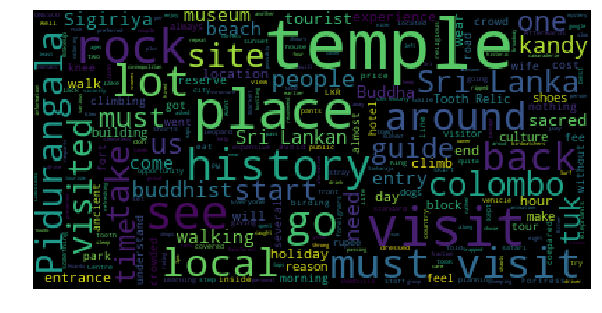

In [78]:
wc(train1['Review'][train1.polarity==0],'black','Common Words' )

In [79]:
train1

Review        date  \
0     Go left and avoid the crowd / Surf sleep drink...  2019/04/16   
1     There is a decent section of beach but the bui...  2019/04/16   
2     The beach is clean and being close to the reef...  2019/04/16   
3     A nice clean beach with a few restaurants all ...  2019/04/16   
4     the beach is beautiful. great surfing spot. bu...  2019/04/16   
5     My advice... do it in the morning before it ge...  2019/04/16   
6     We were very excited to visit .. and more exci...  2019/04/16   
7     The ancient city was one of our favorite stops...  2019/04/16   
8     What an experience it is to climb the rock. Ou...  2019/04/16   
9     This area is fascinating. The museum gives a g...  2019/04/16   
10    Having spent 2 weeks travelling around Sri Lan...  2019/04/16   
11    We climbed the rock and where not let down, it...  2019/04/16   
12    A steep climb up narrow steps following a stea...  2019/04/16   
13    For me, in my opinion, I don’t think it was th...  2019/04/16   
14    This is a fortress and ancient city which if y...  2019/04/16   
15    We visited Sigiriya early morning - I think th...  2019/04/16   
16    Sigiriya Lion's Rock is one of the best and fa...  2019/04/16   
17    I truly enjoyed climbing Sigiriya Rock. Got th...  2019/04/16   
18    The earlier the better to beat the heat and th...  2019/04/16   
19    A big respect to my wife, she had fractured he...  2019/04/16   
20    My daughter and I visited the rock at 630 in t...  2019/04/16   
21    It's not just a climb up the rock but has an i...  2019/04/16   
22    Sigiriya rock is by far the best thing I've se...  2019/04/16   
23    A mix of Ramayana and Buddhism. That would bes...  2019/04/16   
24    There are many steps to climb just to get to t...  2019/04/16   
25    It’s a must to do whilst in Sri Lanka. We stay...  2019/04/16   
26    Go VERY early, it opens at 6 30 and you want t...  2019/04/16   
27    We had a couple of great days in this place, s...  2019/04/16   
28    A group of us (eight birdwatchers), plus a cou...  2019/04/16   
29    No clear information available for entrance fe...  2019/04/16   
...                                                 ...         ...   
5588  As you enter the main site, and climb your fir...  2018/05/04   
5589  The ruins of the capital built by the parricid...  2018/05/04   
5590  Sigiriya is absolutely amazing and well worth ...  2018/05/04   
5591  There are beautiful views from the top of Sigi...  2018/05/04   
5592  Yala National Park is home to elephants, leopa...  2018/05/04   
5593  Visited this museum on 1st May 2018,This museu...  2018/05/04   
5594  Very knowledgeable thing you can see there in ...  2018/05/04   
5595  If you are in galle... then because of this..\...  2018/05/04   
5596  Should visit one of its rituals! The smell is ...  2018/05/04   
5597  Unlike other temples I've been to - this templ...  2018/05/04   
5598  The temple is wonderful and well worth visitin...  2018/05/04   
5599  After reading the TA reviews we caught a tuk t...  2018/05/03   
5600  i was worried as I had seen the clips on You t...  2018/05/03   
5601  worth the climb , a small hike to the top , we...  2018/05/03   
5602  Nice to walk and many restaurant are there for...  2018/05/03   
5603  This safari park has turned into a “jeep-jam c...  2018/05/03   
5604  This is a lovely forest close to Kandy town. A...  2018/05/03   
5605  One of the best place i have been and its so b...  2018/05/03   
5606  It is interesting to see Buddhists coming to t...  2018/05/03   
5607  This temple is in the centre of Kandy near the...  2018/05/03   
5608  i am lucky to visit this place since i was loo...  2018/05/03   
5609  This is a must on your travels in sri lanka. T...  2018/05/02   
5610  I have heard of this 1600-year-old place from ...  2018/05/02   
5611  One of Singapore guy joined a full day safari ...  2018/05/02   
5612  Compact and easy to navigate, lots of great lo...  2018/05/02   
56